In [1]:
import pandas as pd
import numpy as np
import glob
import re
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as matp

## General visualizations of Eye tracker data health

In [2]:
data_frame = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Complete_Data_AngularV.cvs")

In [3]:
data_frame[data_frame.SubjectID == 8695]

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,...,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN,Unnamed: 0.2
11795277,0,0,8695,2,1,1.647249e+09,1.0,1.0,2.382751,2.535233,...,21.016460,NaN,NaN,NaN,NaN,NaN,NaN,Building_162,Building,NaN
11795278,1,1,8695,2,1,1.647249e+09,1.0,1.0,2.383484,2.509918,...,21.016460,0.000000,0.000000,2.0,0.344722,44.789258,44.793483,Building_162,Building,NaN
11795279,2,2,8695,2,1,1.647249e+09,1.0,1.0,2.383484,2.509918,...,21.016460,0.000000,0.000000,NaN,0.344722,44.789258,44.793483,Building_162,Building,NaN
11795280,3,3,8695,2,1,1.647249e+09,1.0,1.0,2.372635,2.525909,...,21.016460,7.228140,7.228140,NaN,0.344722,44.790399,44.793483,Building_162,Building,NaN
11795281,4,4,8695,2,1,1.647249e+09,1.0,1.0,2.362625,2.526581,...,21.016460,0.299764,0.299764,NaN,0.344722,44.791072,44.793483,Building_162,Building,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259586,116521,116521,8695,5,3,1.647942e+09,1.0,1.0,2.675629,2.503693,...,36.100655,63.633817,NaN,NaN,0.115568,118.471454,118.474004,CollisionObject1,Background,NaN
12259587,116522,116522,8695,5,3,1.647942e+09,1.0,1.0,2.675629,2.503693,...,36.100655,4.738626,4.738626,NaN,0.115568,118.420391,118.474004,CollisionObject1,Background,NaN
12259588,116523,116523,8695,5,3,1.647942e+09,1.0,1.0,2.746399,2.465622,...,36.100655,10.049453,10.049453,NaN,0.115568,118.322449,118.474004,CollisionObject1,Background,NaN
12259589,116524,116524,8695,5,3,1.647942e+09,1.0,1.0,2.738586,2.535034,...,36.100655,0.000000,0.000000,NaN,0.115568,118.322449,118.474004,CollisionObject1,Background,NaN


In [4]:
my_categories = {'Global_Landmark': '#e2514a', 
                 'TaskBuilding_Public': '#fca55d',
                'TaskBuilding_Residential': '#fee999',
                'Active_Agent': '#a2d9a4',
                'Passive_Agent': '#47a0b3'}

In [5]:
data_frame.head()

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,...,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN,Unnamed: 0.2
0,0,0,365,1,1,1.635519e+09,1.0,1.0,3.333588,3.785751,...,44.460563,NaN,NaN,NaN,NaN,NaN,NaN,Building_161,Building,NaN
1,1,1,365,1,1,1.635519e+09,1.0,1.0,3.291748,3.744843,...,44.460563,0.000000,NaN,2.0,0.672079,63.996796,63.996938,Building_161,Building,NaN
2,2,2,365,1,1,1.635519e+09,1.0,1.0,3.291748,3.744843,...,44.460563,0.000000,NaN,NaN,0.672079,63.996796,63.996938,Building_161,Building,NaN
3,3,3,365,1,1,1.635519e+09,1.0,1.0,3.259613,3.707169,...,44.460563,73.369491,NaN,NaN,0.672079,63.997106,63.996938,Building_161,Building,NaN
4,4,4,365,1,1,1.635519e+09,1.0,1.0,3.259613,3.707169,...,44.460563,0.642210,0.64221,NaN,0.672079,63.997107,63.996938,Building_161,Building,NaN


In [6]:
# We are excluding two participants because they were exposed to Vincent's experiment
Mask_IDs = data_frame['SubjectID'].isin([ 5238, 8695])
data_frame = data_frame.loc[~Mask_IDs]

In [7]:
data_frame.combinedGazeValidityBitmask.value_counts(normalize=True)

combinedGazeValidityBitmask
3    0.940003
0    0.059997
Name: proportion, dtype: float64

In [8]:
Blinks = pd.DataFrame(data_frame.groupby(["SubjectID", "Session"])["combinedGazeValidityBitmask"].value_counts(normalize=True))
Blinks.rename(columns ={"combinedGazeValidityBitmask": "Percentage"}, inplace=True)
Blinks.reset_index(inplace=True)
Blinks.loc[:, 'Validity'] = Blinks['combinedGazeValidityBitmask'].replace( {3:"Valid", 0:"Invalid"})

In [9]:
Blinks.head()

,SubjectID,Session,combinedGazeValidityBitmask,proportion,Validity
0,365,1,3,0.971096,Valid
1,365,1,0,0.028904,Invalid
2,365,2,3,0.966835,Valid
3,365,2,0,0.033165,Invalid
4,365,3,3,0.970670,Valid


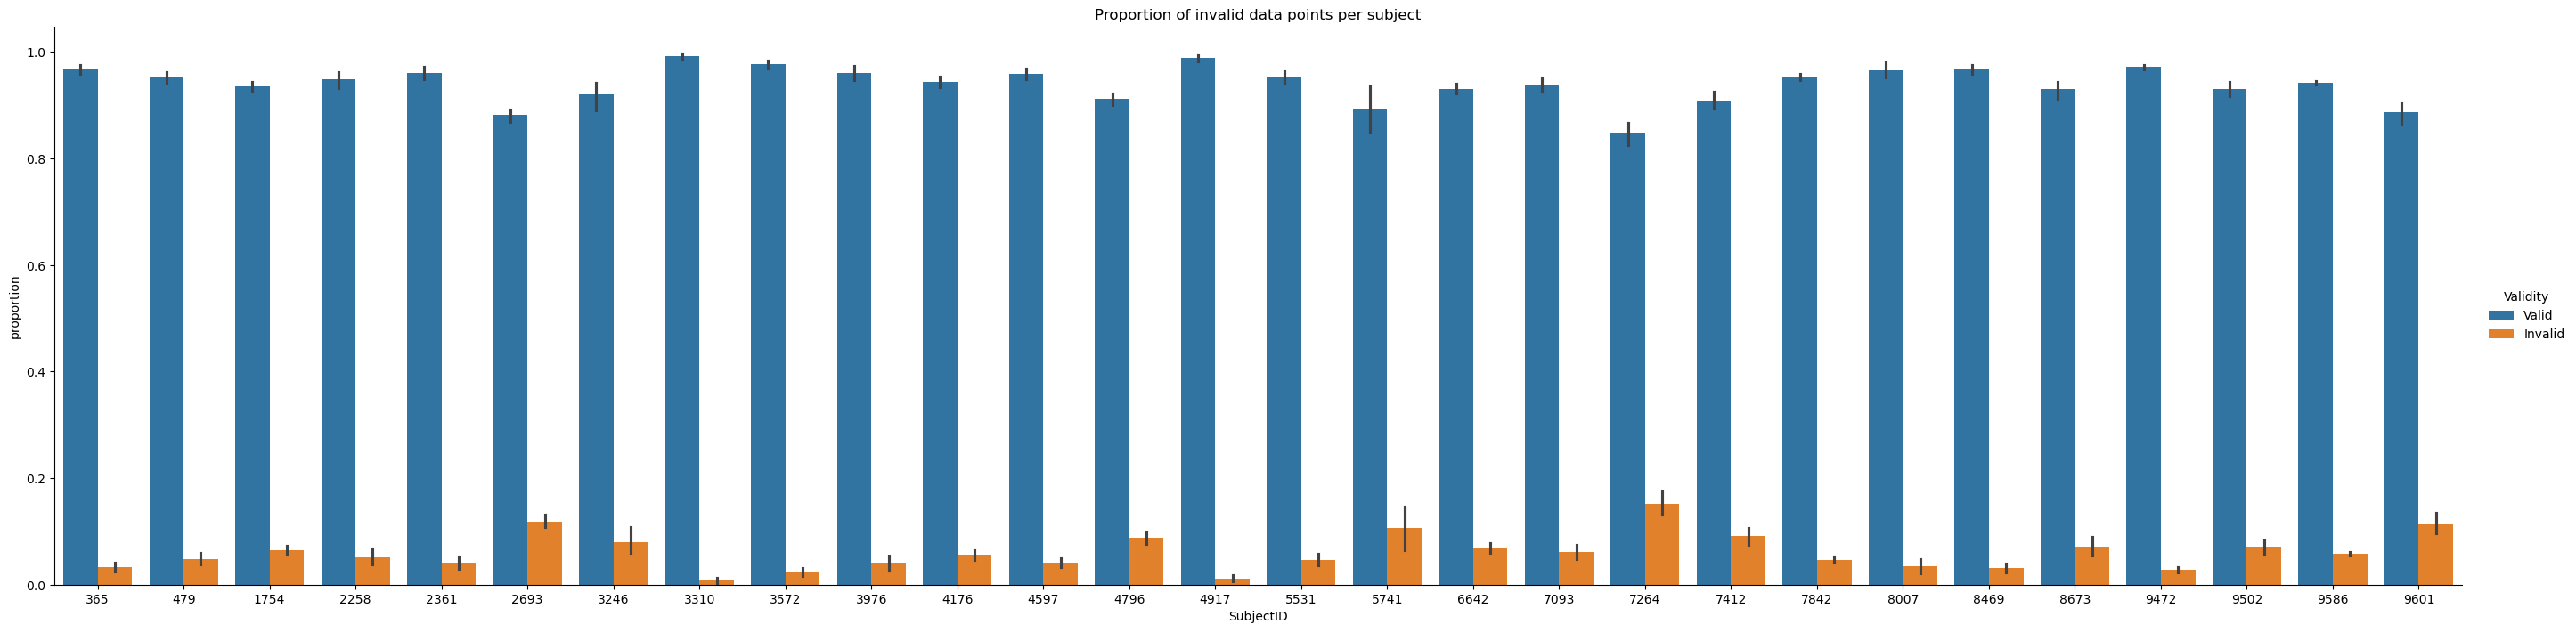

In [10]:
sns.catplot(data=Blinks, hue="Validity", y="proportion", x="SubjectID", kind="bar", \
            height=7, aspect=4).set(title="Proportion of invalid data points per subject")

## Gaze processing

In [11]:
# Take  final row per fixation (the duration, average distance is the same all through the rows of the same fixation)
gaze = data_frame[data_frame.events == -2].copy()
#gaze['Category'] = 'gaze'
saccade = data_frame[data_frame.events == -1].copy()
#saccade['Category'] = 'saccade'

In [12]:
all_Eye =  pd.concat([gaze, saccade])

In [13]:
display(gaze.shape)
display(saccade.shape)
display(all_Eye.shape)

(762938, 128)

(762848, 128)

(1525786, 128)

In [14]:
all_Eye['Event_Type'] = np.where(all_Eye['events'] == -2, 'gaze', 'saccade')

In [15]:
all_Eye.columns

Index(['Unnamed: 0', 'index', 'SubjectID', 'Session', 'SessionSubsection',
       'timeStampDataPointEnd', 'eyeOpennessLeft', 'eyeOpennessRight',
       'pupilDiameterMillimetersLeft', 'pupilDiameterMillimetersRight',
       ...
       'isFix', 'corrected_vel', 'events', 'length', 'distance', 'avg_dist',
       'names', 'Collider_CategoricalN', 'Unnamed: 0.2', 'Event_Type'],
      dtype='object', length=129)

In [16]:
duplicates = all_Eye.duplicated()
print(duplicates.any())

False


In [17]:
aggregations = {
    'length': ['mean',  'median'],  
    'combined_vel': ['mean',  'median']
}

# Group by 'Event_Type' and aggregate
result = all_Eye.groupby('Event_Type').agg(aggregations)
result

length           combined_vel           
                mean    median         mean     median
Event_Type                                            
gaze        0.395684  0.155744    10.283031   6.978696
saccade     0.100148  0.057030   119.574917  58.173101

In [18]:
all_Eye.Gaze.unique()

array(['Movement'], dtype=object)

### Get all gazes whose duration is more than 3.5 median standard deviations out 

In [19]:
gaze["Median_Standard_Duration"] = np.nanmedian(abs(gaze.length - np.nanmedian(gaze.length))) * 1.4826
gaze.loc[:, "gaze_mad_z"] = abs(gaze.length.tolist() - np.nanmedian(gaze.length)) / gaze.Median_Standard_Duration.tolist()
gaze.loc[:,"Outlier_Gaze_Length"] = np.where(gaze["gaze_mad_z"] > 3.5, "Out", "Stays")
gaze_no_out = gaze[gaze.Outlier_Gaze_Length != "Out"].copy()
gaze_no_out.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Complete_Data_AngularV_NO_Outliers.cvs")

In [20]:
gaze_no_outA = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Complete_Data_AngularV_NO_Outliers.cvs")

In [21]:
gaze.Outlier_Gaze_Length.value_counts(normalize=True)

Outlier_Gaze_Length
Stays    0.949413
Out      0.050587
Name: proportion, dtype: float64

In [22]:
gaze.length.agg

<bound method Series.aggregate of 48          0.672079
67          0.288672
82          0.166659
88          0.076880
104         0.211295
              ...   
15879296    0.055271
15879332    0.100192
15879343    0.087295
15879378    0.233120
15879403    0.370016
Name: length, Length: 762938, dtype: float64>

In [23]:
# See how many data points we're loosing by excluding outliers 
display(gaze.shape)
display(gaze_no_out.shape)

(762938, 131)

(724343, 131)

### Gaze Visualizations on complete data 

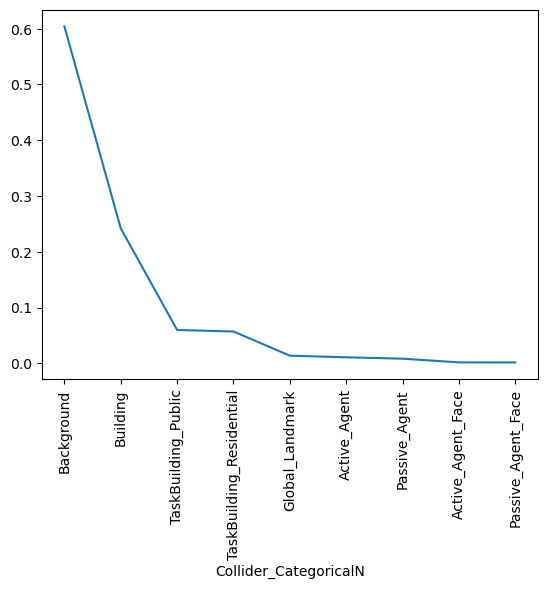

In [24]:
ax = gaze_no_out.Collider_CategoricalN.value_counts(normalize=True).plot()
ax.tick_params(axis='x', labelrotation = 90)

In [25]:
gaze_no_out.Collider_CategoricalN.value_counts()

Collider_CategoricalN
Background                  437498
Building                    175359
TaskBuilding_Public          43407
TaskBuilding_Residential     41426
Global_Landmark              10017
Active_Agent                  7920
Passive_Agent                 6128
Active_Agent_Face             1301
Passive_Agent_Face            1287
Name: count, dtype: int64

In [26]:
data_frame.head()

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,...,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN,Unnamed: 0.2
0,0,0,365,1,1,1.635519e+09,1.0,1.0,3.333588,3.785751,...,44.460563,NaN,NaN,NaN,NaN,NaN,NaN,Building_161,Building,NaN
1,1,1,365,1,1,1.635519e+09,1.0,1.0,3.291748,3.744843,...,44.460563,0.000000,NaN,2.0,0.672079,63.996796,63.996938,Building_161,Building,NaN
2,2,2,365,1,1,1.635519e+09,1.0,1.0,3.291748,3.744843,...,44.460563,0.000000,NaN,NaN,0.672079,63.996796,63.996938,Building_161,Building,NaN
3,3,3,365,1,1,1.635519e+09,1.0,1.0,3.259613,3.707169,...,44.460563,73.369491,NaN,NaN,0.672079,63.997106,63.996938,Building_161,Building,NaN
4,4,4,365,1,1,1.635519e+09,1.0,1.0,3.259613,3.707169,...,44.460563,0.642210,0.64221,NaN,0.672079,63.997107,63.996938,Building_161,Building,NaN


In [27]:
Just_Agents = data_frame[data_frame["Collider_CategoricalN"].isin(["Active_Agent", "Active_Agent_Face","Passive_Agent", "Passive_Agent_Face"])]

Just_Agents = Just_Agents[[ 'SubjectID', 'Session', 'SessionSubsection',
       'timeStampDataPointEnd', 'combinedGazeValidityBitmask','eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y',
       'eyePositionCombinedWorld.z', 'eyeDirectionCombinedWorld.y',
       'eyeDirectionCombinedWorld.z', 'eyeDirectionCombinedLocal.x',
       'eyeDirectionCombinedLocal.y', 'eyeDirectionCombinedLocal.z',
       'playerBodyPosition.x', 'playerBodyPosition.y', 'playerBodyPosition.z',
        'corrected_vel', 'events', 'length', 'distance', 'avg_dist', 'names',
       'Collider_CategoricalN']]
Just_Agents.head()
Just_Agents.to_csv("/Volumes/TwoTeras/PCA/Data_Sets/Just_Agents_Exp1.csv")

In [28]:
#General plotting settings
sns.set(rc={"figure.figsize":(20, 15)})
sns.set(font_scale = 1.3)
plt.tight_layout()

<Figure size 2000x1500 with 0 Axes>

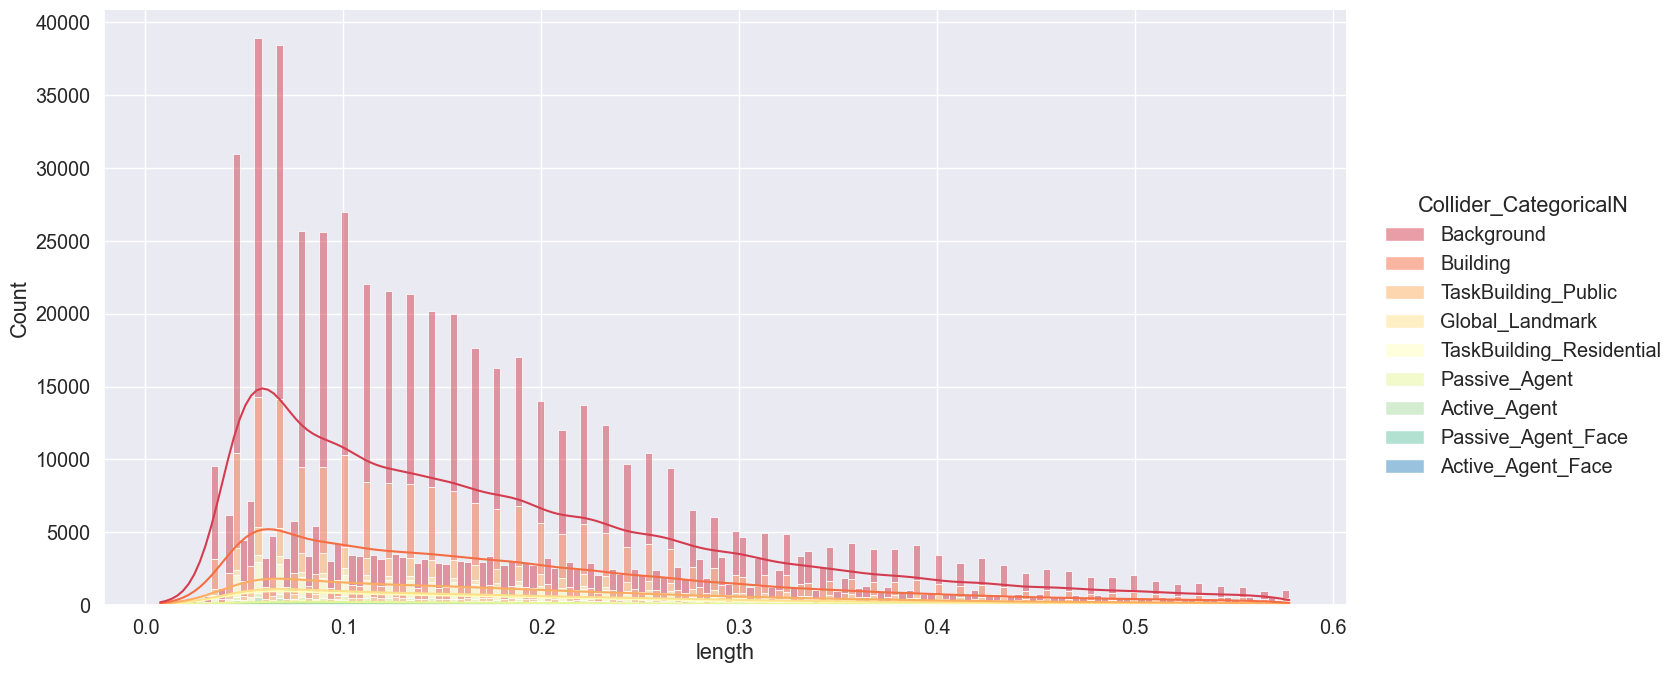

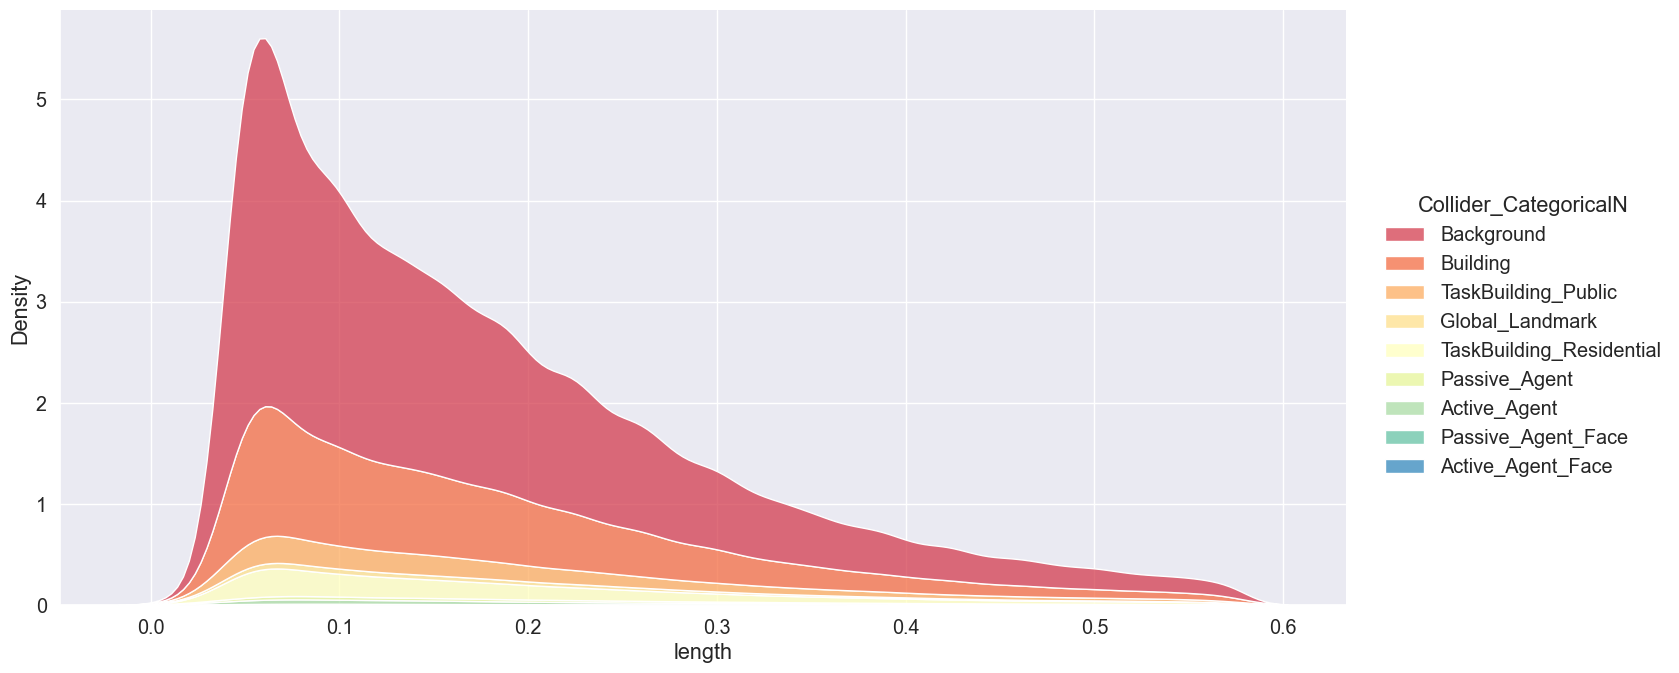

In [29]:
sns.displot(x='length', hue="Collider_CategoricalN",
             data=gaze_no_out, 
            height=7, aspect= 2, kde=True, palette="Spectral",  multiple="stack")

sns.displot(x='length', hue="Collider_CategoricalN",
             data=gaze_no_out, 
            height=7, aspect= 2, kind="kde", palette="Spectral", multiple="stack")

In [30]:
# Since the collider names are too detailed, here we create a dictionary with patterns to classify them into our categories of interest
patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
patterns.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))
patterns.update(dict.fromkeys(['^TaskBuilding_2$','^TaskBuilding_3$', '^TaskBuilding_5$', '^TaskBuilding_8$', '^TaskBuilding_9$', '^TaskBuilding_11$', '^TaskBuilding_13$', '^TaskBuilding_14$', '^TaskBuilding_20$', 
                               '^TaskBuilding_21$', '^TaskBuilding_23$','^TaskBuilding_27$', '^TaskBuilding_29$', '^TaskBuilding_32$', '^TaskBuilding_34$',  '^TaskBuilding_38$', '^TaskBuilding_41$', '^TaskBuilding_42$', 
                               '^TaskBuilding_44$', '^TaskBuilding_45$', '^TaskBuilding_47$', '^TaskBuilding_50$', '^TaskBuilding_51$', '^TaskBuilding_52$', 'BasketballCourt_58', 'Construction_57', 
                               '^Graffity_02$', '^Graffity_03$', '^Graffity_05$', '^Graffity_08$', '^Graffity_09$', '^Graffity_11$', '^Graffity_13$', '^Graffity_14$', '^Graffity_20$', 
                               '^Graffity_21$', '^Graffity_23$', '^Graffity_27$', '^Graffity_29$', '^Graffity_32$', '^Graffity_34$', '^Graffity_38$', '^Graffity_41$', '^Graffity_42$', 
                               '^Graffity_44$', '^Graffity_45$', '^Graffity_47$',  '^Graffity_50$', '^Graffity_51$', '^Graffity_52$'], 'TaskBuilding_Public'))

patterns.update(dict.fromkeys(['^TaskBuilding_1$','^TaskBuilding_4$', '^TaskBuilding_6$', '^TaskBuilding_7$', '^TaskBuilding_12$', '^TaskBuilding_15$', '^TaskBuilding_17$', '^TaskBuilding_18$', '^TaskBuilding_19$', 
                               '^TaskBuilding_22$', '^TaskBuilding_24$','^TaskBuilding_25$', '^TaskBuilding_26$', '^TaskBuilding_28$', '^TaskBuilding_30$',  '^TaskBuilding_31$', '^TaskBuilding_33$', '^TaskBuilding_35$', 
                               '^TaskBuilding_36$', '^TaskBuilding_37$', '^TaskBuilding_39$', '^TaskBuilding_40$', '^TaskBuilding_43$', '^TaskBuilding_48$', '^TaskBuilding_54$','^TaskBuilding_55$',
                               '^Graffity_01$','^Graffity_04$', '^Graffity_06$', '^Graffity_07$', '^Graffity_12$', '^Graffity_15$', '^Graffity_17$', '^Graffity_18$', '^Graffity_19$', '^Graffity_22$', 
                               '^Graffity_24$','^Graffity_25$', '^Graffity_26$', '^Graffity_28$', '^Graffity_30$',  '^Graffity_31$', '^Graffity_33$', '^Graffity_35$', '^Graffity_36$', '^Graffity_37$', '^Graffity_39$', 
                               '^Graffity_40$', '^Graffity_43$', '^Graffity_48$', '^Graffity_54$', '^Graffity_55$' ], 'TaskBuilding_Residential'))
default_val = 'Background'

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/4156940148.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/4156940148.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/4156940148.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}


In [31]:
gaze_no_out["Collider_CategoricalN"] =  gaze_no_out['names'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))
#string_to_add = "_Face"
# Define the condition and the string to add
#Mask_1f = ((data_frame_gaze_no_out_ONLY_TEST['Collider_CategoricalN'] == "Active_Agent") & (data_frame_gaze_no_out_ONLY_TEST['Face_Hits'] == "Face")) | ((data_frame_gaze_no_out_ONLY_TEST['Collider_CategoricalN'] == "Passive_Agent") & (data_frame_gaze_no_out_ONLY_TEST['Face_Hits'] == "Face"))
#data_frame_gaze_no_out_ONLY_TEST.loc[Mask_1f, 'Collider_CategoricalN'] = data_frame_gaze_no_out_ONLY_TEST.loc[Mask_1f, 'Collider_CategoricalN'] + string_to_add

In [32]:
#Keep only the gazes that happened on the categories of interest
data_frame_gaze_no_out_ONLY_TEST = gaze_no_out[(gaze_no_out.Collider_CategoricalN != "Background") & (gaze_no_out.Collider_CategoricalN != "Building")].copy()
#One with all buildings
data_frame_gaze_no_out_Buildings = gaze_no_out[(gaze_no_out.Collider_CategoricalN != "Background")].copy()

In [33]:
data_frame_gaze_no_out_Buildings.Collider_CategoricalN.value_counts(normalize=True)

Collider_CategoricalN
Building                    0.611337
TaskBuilding_Public         0.151326
TaskBuilding_Residential    0.144419
Global_Landmark             0.034921
Active_Agent                0.032146
Passive_Agent               0.025850
Name: proportion, dtype: float64

In [34]:
gaze_no_out.Collider_CategoricalN.value_counts(normalize=True)

Collider_CategoricalN
Background                  0.603993
Building                    0.242094
TaskBuilding_Public         0.059926
TaskBuilding_Residential    0.057191
Global_Landmark             0.013829
Active_Agent                0.012730
Passive_Agent               0.010237
Name: proportion, dtype: float64

In [35]:
data_frame_gaze_no_out_ONLY_TEST.head()

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,...,events,length,distance,avg_dist,names,Collider_CategoricalN,Unnamed: 0.2,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length
316,316,316,365,1,1,1.635519e+09,1.0,0.829215,2.887436,3.226044,...,-2.0,0.124000,43.050664,43.036356,TaskBuilding_5,TaskBuilding_Public,NaN,0.120602,0.263215,Stays
608,608,608,365,1,1,1.635519e+09,1.0,0.839791,3.157501,3.893158,...,-2.0,0.310992,313.448669,313.458663,Crane_59,Global_Landmark,NaN,0.120602,1.287278,Stays
955,955,955,365,1,1,1.635519e+09,1.0,1.000000,3.294250,3.616379,...,-2.0,0.065968,11.082966,11.082815,TaskBuilding_35,TaskBuilding_Residential,NaN,0.120602,0.744402,Stays
983,983,983,365,1,1,1.635519e+09,1.0,1.000000,3.433594,3.727554,...,-2.0,0.277758,11.000281,11.025753,TaskBuilding_35,TaskBuilding_Residential,NaN,0.120602,1.011713,Stays
992,992,992,365,1,1,1.635519e+09,1.0,0.775504,3.550278,3.980347,...,-2.0,0.055552,12.353104,12.353196,TaskBuilding_35,TaskBuilding_Residential,NaN,0.120602,0.830769,Stays


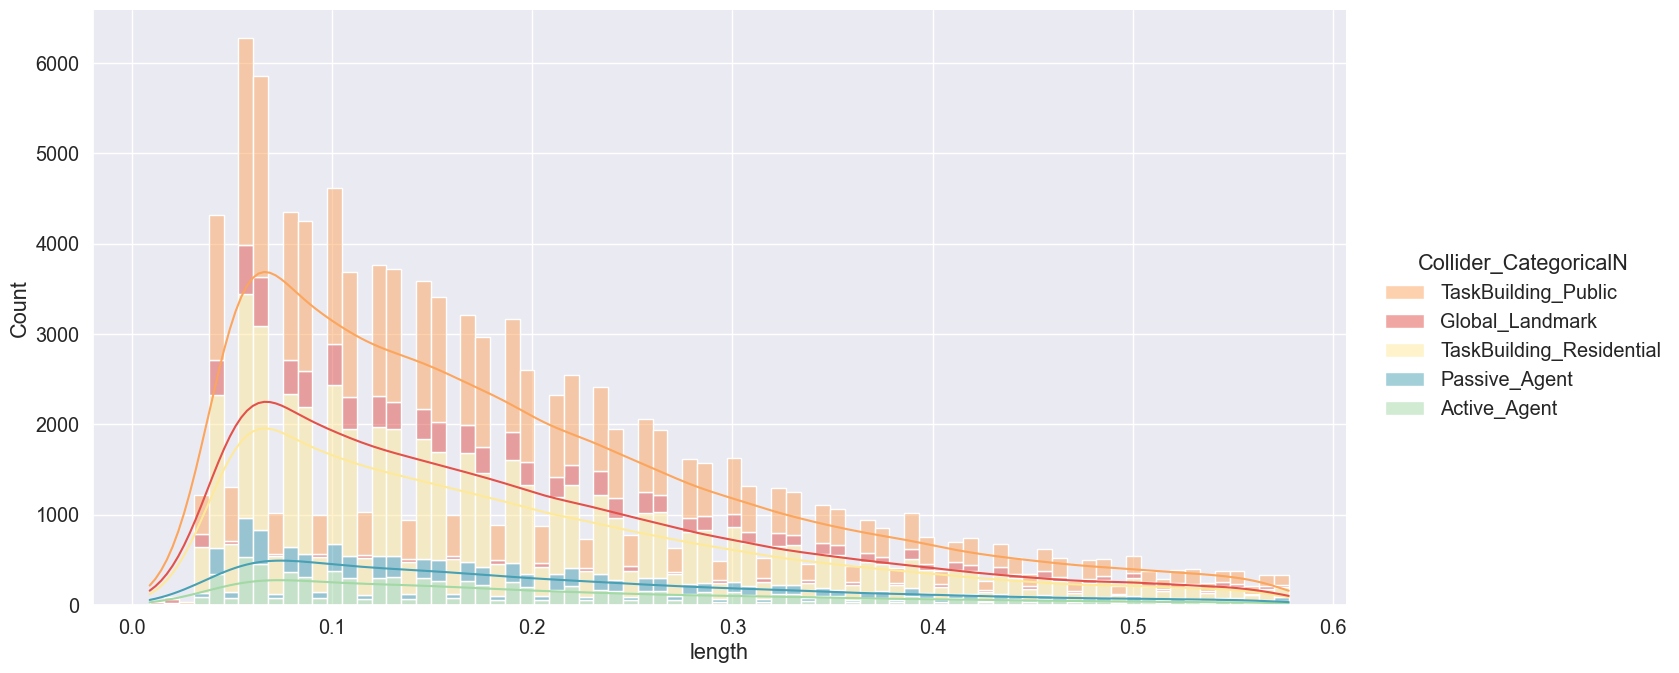

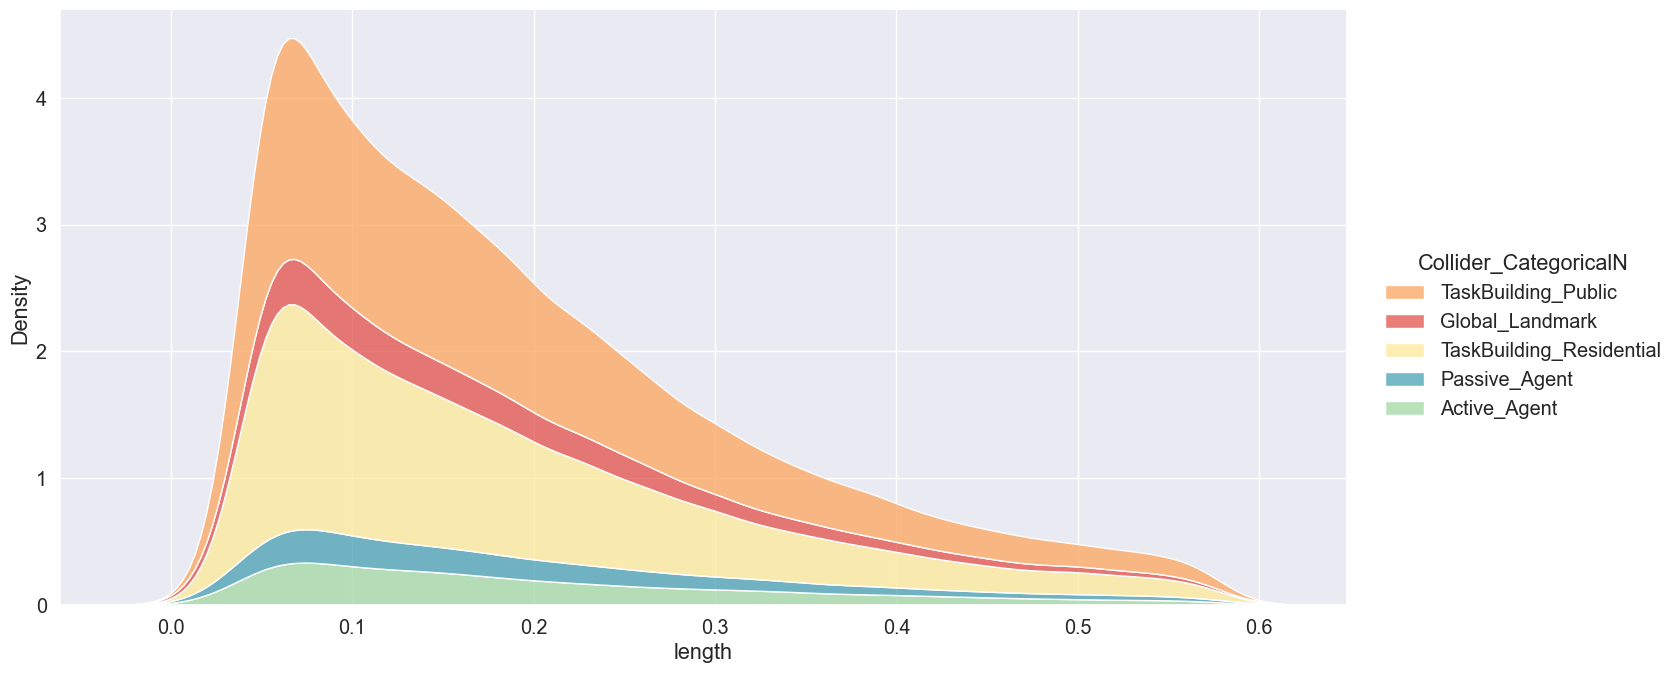

In [36]:
data = data_frame_gaze_no_out_ONLY_TEST.copy()
sns.displot(x='length', hue="Collider_CategoricalN",
             data=data, 
            height=7, aspect= 2, kde=True, palette=my_categories, multiple="stack")

sns.displot(x='length', hue="Collider_CategoricalN",
             data=data, 
            height=7, aspect= 2, kind="kde", palette=my_categories, multiple="stack")

In [37]:
data_frame_gaze_no_out_ONLY_TEST.Collider_CategoricalN.unique()

array(['TaskBuilding_Public', 'Global_Landmark',
       'TaskBuilding_Residential', 'Passive_Agent', 'Active_Agent'],
      dtype=object)

In [38]:
data_frame_gaze_no_out_Buildings.Collider_CategoricalN.unique()

array(['Building', 'TaskBuilding_Public', 'Global_Landmark',
       'TaskBuilding_Residential', 'Passive_Agent', 'Active_Agent'],
      dtype=object)

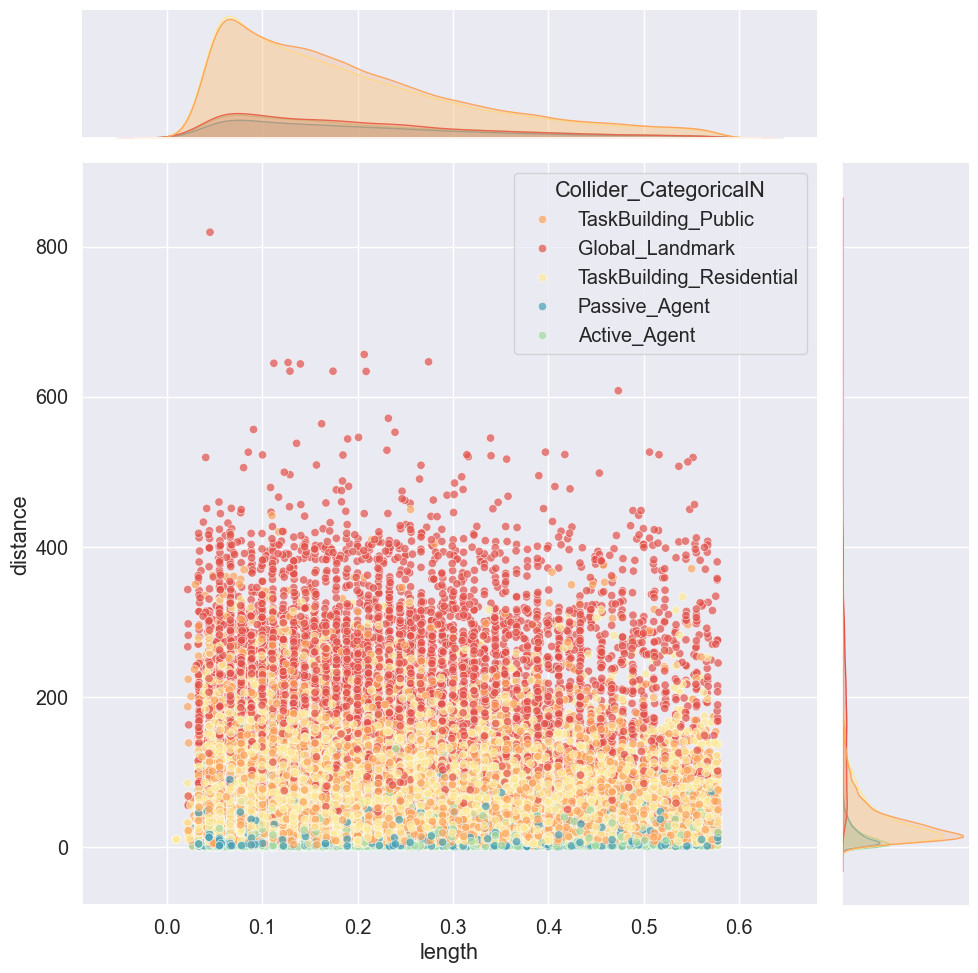

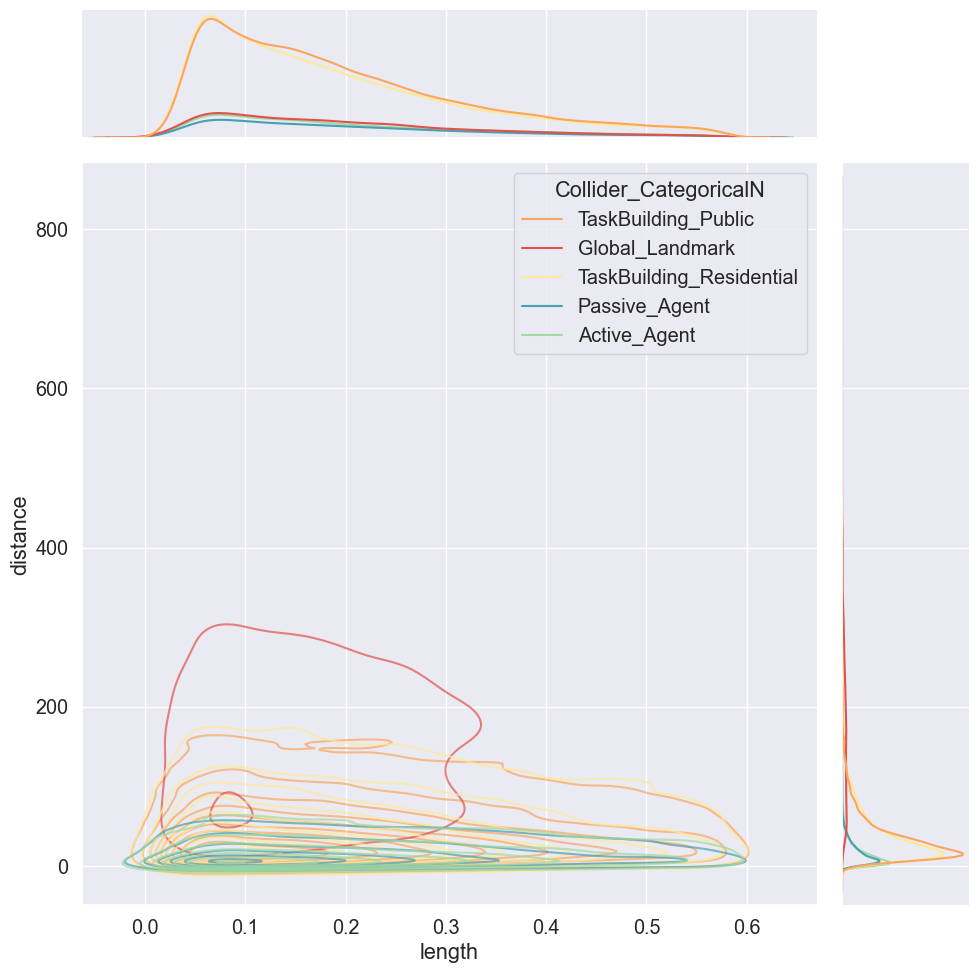

In [39]:
sns.jointplot(data=data_frame_gaze_no_out_ONLY_TEST, y="distance", x="length", hue="Collider_CategoricalN",  height=10, alpha=0.7, palette=my_categories)
sns.jointplot(data=data_frame_gaze_no_out_ONLY_TEST, y="distance", x="length", hue="Collider_CategoricalN",  height=10, alpha=0.7, palette=my_categories,  kind="kde")

In [40]:
# Create a Dictionary that identifies agent, graffity and house into this three categories
patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', 'BasketballCourt_58': 'Building', '^Graffity':'Graffity'}
patterns2.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/1524466946.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', 'BasketballCourt_58': 'Building', '^Graffity':'Graffity'}
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/1524466946.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', 'BasketballCourt_58': 'Building', '^Graffity':'Graffity'}


In [41]:
data_frame_gaze_no_out_ONLY_TEST['Hit_Object_Category'] = data_frame_gaze_no_out_ONLY_TEST['names'].apply(lambda x: next((val for key, val in patterns2.items() if re.match(key, x)), default_val))
data_frame_gaze_no_out_Buildings['Hit_Object_Category'] = data_frame_gaze_no_out_Buildings['names'].apply(lambda x: next((val for key, val in patterns2.items() if re.match(key, x)), default_val))

In [42]:
data_frame_gaze_no_out_ONLY_TEST = data_frame_gaze_no_out_ONLY_TEST.loc[:, ~data_frame_gaze_no_out_ONLY_TEST.columns.str.contains('^Unnamed')]
data_frame_gaze_no_out_ONLY_TEST.head()

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,leftGazeValidityBitmask,...,events,length,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,Hit_Object_Category
316,316,365,1,1,1.635519e+09,1.0,0.829215,2.887436,3.226044,31,...,-2.0,0.124000,43.050664,43.036356,TaskBuilding_5,TaskBuilding_Public,0.120602,0.263215,Stays,Building
608,608,365,1,1,1.635519e+09,1.0,0.839791,3.157501,3.893158,31,...,-2.0,0.310992,313.448669,313.458663,Crane_59,Global_Landmark,0.120602,1.287278,Stays,Global_Landmark
955,955,365,1,1,1.635519e+09,1.0,1.000000,3.294250,3.616379,31,...,-2.0,0.065968,11.082966,11.082815,TaskBuilding_35,TaskBuilding_Residential,0.120602,0.744402,Stays,Building
983,983,365,1,1,1.635519e+09,1.0,1.000000,3.433594,3.727554,31,...,-2.0,0.277758,11.000281,11.025753,TaskBuilding_35,TaskBuilding_Residential,0.120602,1.011713,Stays,Building
992,992,365,1,1,1.635519e+09,1.0,0.775504,3.550278,3.980347,31,...,-2.0,0.055552,12.353104,12.353196,TaskBuilding_35,TaskBuilding_Residential,0.120602,0.830769,Stays,Building


### Recode to count the graffity as the house hit 

In [43]:
# Map graffity into the name of the building that it's in front of 
Graffity_mapping = {'Graffity_14':'TaskBuilding_14', 
                  'Graffity_41': 'TaskBuilding_41',
                  'Graffity_02': 'TaskBuilding_2', 
                  'Graffity_47': 'TaskBuilding_47',
                  'Graffity_20': 'TaskBuilding_20',
                  'Graffity_09': 'TaskBuilding_9',
                  'Graffity_50': 'TaskBuilding_50',
                  'Graffity_45': 'TaskBuilding_45',
                  'Graffity_08': 'TaskBuilding_8',
                  'Graffity_27': 'TaskBuilding_27',
                  'Graffity_51': 'TaskBuilding_51',
                  'Graffity_03': 'TaskBuilding_3',
                  'Graffity_11': 'TaskBuilding_11',
                  'Graffity_42': 'TaskBuilding_42',
                  'Graffity_23': 'TaskBuilding_23',
                  'Graffity_52': 'TaskBuilding_52',
                  'Graffity_38': 'TaskBuilding_38',
                  'Graffity_34': 'TaskBuilding_34',
                  'Graffity_05': 'TaskBuilding_5',
                  'Graffity_29': 'TaskBuilding_29',
                  'Graffity_32': 'TaskBuilding_32',
                  'Graffity_13': 'TaskBuilding_13',
                  'Graffity_44': 'TaskBuilding_44',
                  'Graffity_21': 'TaskBuilding_21',
                  'Graffity_04': 'TaskBuilding_4',
                  'Graffity_01': 'TaskBuilding_1',
                  'Graffity_06': 'TaskBuilding_6',
                  'Graffity_07': 'TaskBuilding_7',  
                  'Graffity_17': 'TaskBuilding_17', 
                  'Graffity_15': 'TaskBuilding_15',
                  'Graffity_12': 'TaskBuilding_12',
                  'Graffity_18': 'TaskBuilding_18',
                  'Graffity_19': 'TaskBuilding_19',
                  'Graffity_22': 'TaskBuilding_22',
                  'Graffity_24': 'TaskBuilding_24',
                  'Graffity_25': 'TaskBuilding_25',
                  'Graffity_26': 'TaskBuilding_26',
                  'Graffity_28': 'TaskBuilding_28',
                  'Graffity_30': 'TaskBuilding_30',
                  'Graffity_31': 'TaskBuilding_31',
                  'Graffity_33': 'TaskBuilding_33',
                  'Graffity_35': 'TaskBuilding_35',
                  'Graffity_36': 'TaskBuilding_36',
                  'Graffity_37': 'TaskBuilding_37',
                  'Graffity_39': 'TaskBuilding_39',
                  'Graffity_40': 'TaskBuilding_40',
                  'Graffity_43': 'TaskBuilding_43',
                  'Graffity_48': 'TaskBuilding_48',
                  'Graffity_54': 'TaskBuilding_54',
                  'Graffity_55': 'TaskBuilding_55'
             }

In [44]:
data_frame_gaze_no_out_ONLY_TEST.loc[:, 'recoded'] = data_frame_gaze_no_out_ONLY_TEST.loc[:,'names']
data_frame_gaze_no_out_ONLY_TEST['recoded'].replace(Graffity_mapping, inplace=True)
data_frame_gaze_no_out_Buildings.loc[:, 'recoded'] = data_frame_gaze_no_out_Buildings.loc[:,'names']
data_frame_gaze_no_out_Buildings['recoded'].replace(Graffity_mapping, inplace=True)

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/928039336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame_gaze_no_out_ONLY_TEST['recoded'].replace(Graffity_mapping, inplace=True)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/928039336.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [45]:
data_frame_gaze_no_out_ONLY_TEST["Collider_CategoricalN"] =  data_frame_gaze_no_out_ONLY_TEST['recoded'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))
data_frame_gaze_no_out_Buildings["Collider_CategoricalN"] =  data_frame_gaze_no_out_Buildings['recoded'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))

In [46]:
data_frame_gaze_no_out_Buildings.Collider_CategoricalN.unique()

array(['Building', 'TaskBuilding_Public', 'Global_Landmark',
       'TaskBuilding_Residential', 'Passive_Agent', 'Active_Agent'],
      dtype=object)

In [47]:
data_frame_gaze_no_out_ONLY_TEST.shape

(111486, 131)

In [48]:
data_frame_gaze_no_out_Buildings.shape

(286845, 133)

## Cummulative sum calculation

In [49]:
data_frame_gaze_no_out_ONLY_TEST["cumsum_length"] = data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID", "recoded", "Collider_CategoricalN"])['length'].cumsum()
data_frame_gaze_no_out_Buildings["cumsum_length"] = data_frame_gaze_no_out_Buildings.groupby(["SubjectID", "recoded", "Collider_CategoricalN"])['length'].cumsum()

In [50]:
data_frame_gaze_no_out_ONLY_TEST.head(20)

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,leftGazeValidityBitmask,...,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,Hit_Object_Category,recoded,cumsum_length
316,316,365,1,1,1.635519e+09,1.000000,0.829215,2.887436,3.226044,31,...,43.050664,43.036356,TaskBuilding_5,TaskBuilding_Public,0.120602,0.263215,Stays,Building,TaskBuilding_5,0.124000
608,608,365,1,1,1.635519e+09,1.000000,0.839791,3.157501,3.893158,31,...,313.448669,313.458663,Crane_59,Global_Landmark,0.120602,1.287278,Stays,Global_Landmark,Crane_59,0.310992
955,955,365,1,1,1.635519e+09,1.000000,1.000000,3.294250,3.616379,31,...,11.082966,11.082815,TaskBuilding_35,TaskBuilding_Residential,0.120602,0.744402,Stays,Building,TaskBuilding_35,0.065968
983,983,365,1,1,1.635519e+09,1.000000,1.000000,3.433594,3.727554,31,...,11.000281,11.025753,TaskBuilding_35,TaskBuilding_Residential,0.120602,1.011713,Stays,Building,TaskBuilding_35,0.343726
992,992,365,1,1,1.635519e+09,1.000000,0.775504,3.550278,3.980347,31,...,12.353104,12.353196,TaskBuilding_35,TaskBuilding_Residential,0.120602,0.830769,Stays,Building,TaskBuilding_35,0.399277
996,996,365,1,1,1.635519e+09,1.000000,0.756466,3.486023,4.028381,31,...,12.368648,12.368533,TaskBuilding_35,TaskBuilding_Residential,0.120602,0.838983,Stays,Building,TaskBuilding_35,0.453838
1024,1024,365,1,1,1.635519e+09,1.000000,1.000000,3.443344,3.884399,31,...,7.717722,7.681729,46_Sa,Passive_Agent,0.120602,2.665030,Stays,Agent,46_Sa,0.477151
1036,1036,365,1,1,1.635519e+09,1.000000,1.000000,3.536682,3.907547,31,...,12.486300,12.485458,Graffity_35,TaskBuilding_Residential,0.120602,0.740284,Stays,Graffity,TaskBuilding_35,0.520303
1042,1042,365,1,1,1.635519e+09,1.000000,0.885227,3.439575,3.936859,31,...,12.619518,12.619210,Graffity_35,TaskBuilding_Residential,0.120602,0.645703,Stays,Graffity,TaskBuilding_35,0.598173
1070,1070,365,1,1,1.635519e+09,1.000000,1.000000,3.462418,3.843201,31,...,12.562698,12.583401,Graffity_35,TaskBuilding_Residential,0.120602,0.542880,Stays,Graffity,TaskBuilding_35,0.819390


In [51]:
data_frame_gaze_no_out_ONLY_TEST[["length", "recoded", "cumsum_length"]] 

,length,recoded,cumsum_length
316,0.124000,TaskBuilding_5,0.124000
608,0.310992,Crane_59,0.310992
955,0.065968,TaskBuilding_35,0.065968
983,0.277758,TaskBuilding_35,0.343726
992,0.055552,TaskBuilding_35,0.399277
...,...,...,...
15879025,0.055056,10_Cma,7.312267
15879033,0.077376,TaskBuilding_8,13.449327
15879049,0.143840,10_Cma,7.456107
15879065,0.236097,TaskBuilding_8,13.685424


In [52]:
data_frame_gaze_no_out_ONLY_TEST.cumsum_length.describe()

count    111486.000000
mean          8.034011
std           8.110680
min           0.010912
25%           2.348731
50%           5.668157
75%          11.022115
max          83.283593
Name: cumsum_length, dtype: float64

In [53]:
Dwelling_time = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID","recoded","Collider_CategoricalN"])["cumsum_length"].max())
Dwelling_time.reset_index(inplace=True)
Count = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID","recoded","Collider_CategoricalN"])["cumsum_length"].count())
Count.reset_index(inplace=True)
Fixations = Dwelling_time.merge(Count, on=["SubjectID", "recoded","Collider_CategoricalN"])
Fixations.rename({"cumsum_length_x": "Dwelling_Time", "cumsum_length_y":"Fixation_Count"}, axis=1, inplace=True)

In [54]:
Dwelling_time_Building = pd.DataFrame(data_frame_gaze_no_out_Buildings.groupby(["SubjectID","recoded","Collider_CategoricalN"])["cumsum_length"].max())
Dwelling_time_Building.reset_index(inplace=True)
Count_Building = pd.DataFrame(data_frame_gaze_no_out_Buildings.groupby(["SubjectID","recoded","Collider_CategoricalN"])["cumsum_length"].count())
Count_Building.reset_index(inplace=True)
Fixations_Building = Dwelling_time_Building.merge(Count_Building, on=["SubjectID", "recoded","Collider_CategoricalN"])
Fixations_Building.rename({"cumsum_length_x": "Dwelling_Time", "cumsum_length_y":"Fixation_Count"}, axis=1, inplace=True)

In [55]:
Dwelling_time_Building.Collider_CategoricalN.unique()

array(['Active_Agent', 'Passive_Agent', 'TaskBuilding_Public', 'Building',
       'Global_Landmark', 'TaskBuilding_Residential'], dtype=object)

In [56]:
Fixations_Building.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Buildings_Exp1.cvs")

In [57]:
Fixations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SubjectID              2952 non-null   int64  
 1   recoded                2952 non-null   object 
 2   Collider_CategoricalN  2952 non-null   object 
 3   Dwelling_Time          2952 non-null   float64
 4   Fixation_Count         2952 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 115.4+ KB


In [58]:
Fixations_Building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7856 entries, 0 to 7855
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SubjectID              7856 non-null   int64  
 1   recoded                7856 non-null   object 
 2   Collider_CategoricalN  7856 non-null   object 
 3   Dwelling_Time          7856 non-null   float64
 4   Fixation_Count         7856 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 307.0+ KB


## Make sure that the cummulative sum equals the same as the raw length 

In [59]:
Fixation_sum = pd.DataFrame(Fixations.groupby(["SubjectID"])["Dwelling_Time"].sum())
Fixation_sum.reset_index(inplace=True)
Fixation_sum.loc[:, "Minutes"] = (Fixation_sum.Dwelling_Time)/60
Fixation_sum.loc[:, "Hours"] = (Fixation_sum.Minutes)/60
Fixation_sum

,SubjectID,Dwelling_Time,Minutes,Hours
0,365,670.195660,11.169928,0.186165
1,479,996.060922,16.601015,0.276684
2,1754,1058.807697,17.646795,0.294113
3,2258,1025.001573,17.083360,0.284723
4,2361,853.782435,14.229707,0.237162
5,2693,945.511819,15.758530,0.262642
6,3246,629.903736,10.498396,0.174973
7,3310,753.454066,12.557568,0.209293
8,3572,802.816193,13.380270,0.223004
9,3976,605.621105,10.093685,0.168228


In [60]:
Fixation_sum[Fixation_sum.SubjectID == 5238]

,SubjectID,Dwelling_Time,Minutes,Hours


In [61]:
Complete_Sum = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID"])["length"].sum())
Complete_Sum.reset_index(inplace=True)
Complete_Sum.loc[:, "Minutes"] = (Complete_Sum.length)/60
Complete_Sum.loc[:, "Hours"] = (Complete_Sum.Minutes)/60
Complete_Sum

,SubjectID,length,Minutes,Hours
0,365,670.195660,11.169928,0.186165
1,479,996.060922,16.601015,0.276684
2,1754,1058.807697,17.646795,0.294113
3,2258,1025.001573,17.083360,0.284723
4,2361,853.782435,14.229707,0.237162
5,2693,945.511819,15.758530,0.262642
6,3246,629.903736,10.498396,0.174973
7,3310,753.454066,12.557568,0.209293
8,3572,802.816193,13.380270,0.223004
9,3976,605.621105,10.093685,0.168228


In [62]:
TaskBuildings_GL = Fixations.loc[(Fixations.recoded.str.match('^TaskBuilding_')) | (Fixations.Collider_CategoricalN == 'Global_Landmark') ]
order_buildings = pd.DataFrame(TaskBuildings_GL.groupby("recoded")["Dwelling_Time"].median().sort_values(ascending=False))
Agents = Fixations.loc[Fixations.Collider_CategoricalN.str.contains("Agent")]
order_agents = pd.DataFrame(Agents.groupby("recoded")["Dwelling_Time"].median().sort_values(ascending=False))

In [63]:
Agents

,SubjectID,recoded,Collider_CategoricalN,Dwelling_Time,Fixation_Count
0,365,01_Cma,Active_Agent,0.999441,5
1,365,02_Cma,Active_Agent,2.241917,8
2,365,05_Cma,Active_Agent,0.255441,2
3,365,06_Cma,Active_Agent,4.235831,19
4,365,07_Cma,Active_Agent,1.380368,6
...,...,...,...,...,...
2891,9601,51_Sa,Passive_Agent,6.200965,27
2892,9601,52_Sa,Passive_Agent,1.078302,5
2893,9601,53_Sa,Passive_Agent,0.376387,2
2894,9601,54_Sa,Passive_Agent,0.388366,2


### Visualization of Dweling-Times (AKA. cummulative sums) 

In [64]:
Fixations[['Dwelling_Time', 'Fixation_Count']].corr().style.background_gradient(cmap="Spectral")

,Dwelling_Time,Fixation_Count
Dwelling_Time,1.000000,0.987435
Fixation_Count,0.987435,1.000000


In [65]:
Fixation_count = pd.DataFrame(Fixations.groupby("Collider_CategoricalN")["Fixation_Count"].mean().sort_values(ascending=False))
Fixation_count

,Fixation_Count
Collider_CategoricalN,
Global_Landmark,89.437500
TaskBuilding_Public,60.037344
TaskBuilding_Residential,56.982118
Active_Agent,13.024011
Passive_Agent,10.872434


In [66]:
pal = sns.color_palette("Spectral")
display(pal.as_hex()[:])
Fixations.Collider_CategoricalN.unique()

['#e2514a', '#fca55d', '#fee999', '#edf8a3', '#a2d9a4', '#47a0b3']

array(['Active_Agent', 'Passive_Agent', 'TaskBuilding_Public',
       'Global_Landmark', 'TaskBuilding_Residential'], dtype=object)

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/3700998998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="Collider_CategoricalN", x="Fixation_Count", order= Fixation_count.index.values, data=Fixations, \
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/3700998998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(y="Collider_CategoricalN", x="Fixation_Count",  order= Fixation_count.index.values, data=Fixations, \
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/3700998998.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(y="Collid

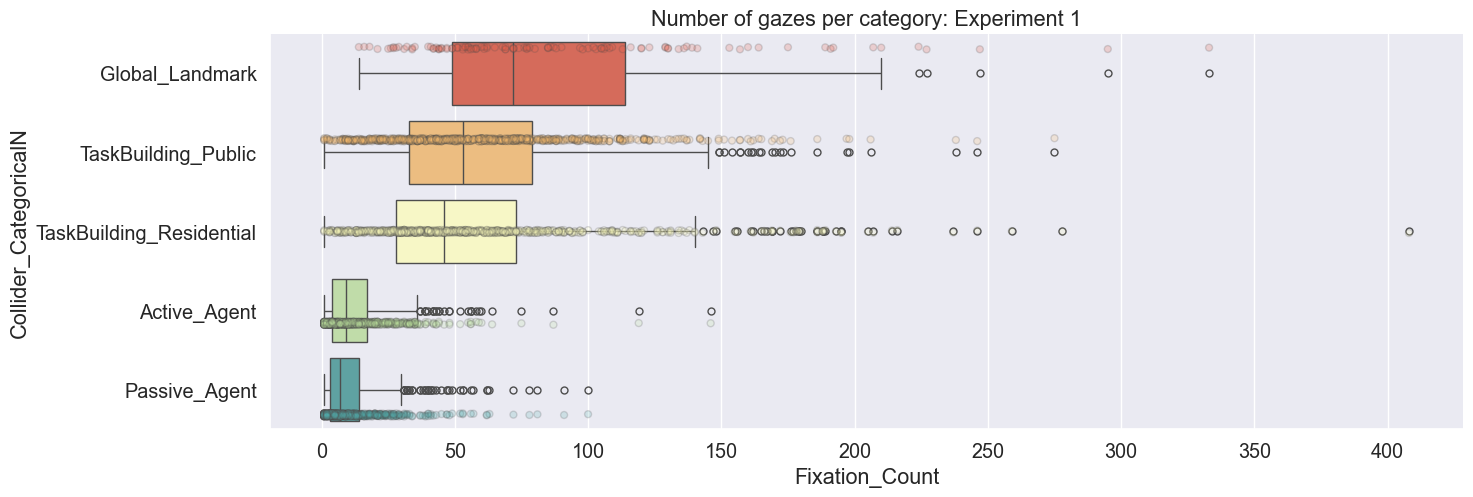

In [67]:
sns.catplot(y="Collider_CategoricalN", x="Fixation_Count", order= Fixation_count.index.values, data=Fixations, \
            height=5, aspect=3, kind='box', palette="Spectral").set(title="Number of gazes per category: Experiment 1")
ax = sns.stripplot(y="Collider_CategoricalN", x="Fixation_Count",  order= Fixation_count.index.values, data=Fixations, \
                   alpha=0.2, dodge=True,linewidth=1,edgecolor='gray', palette="Spectral")


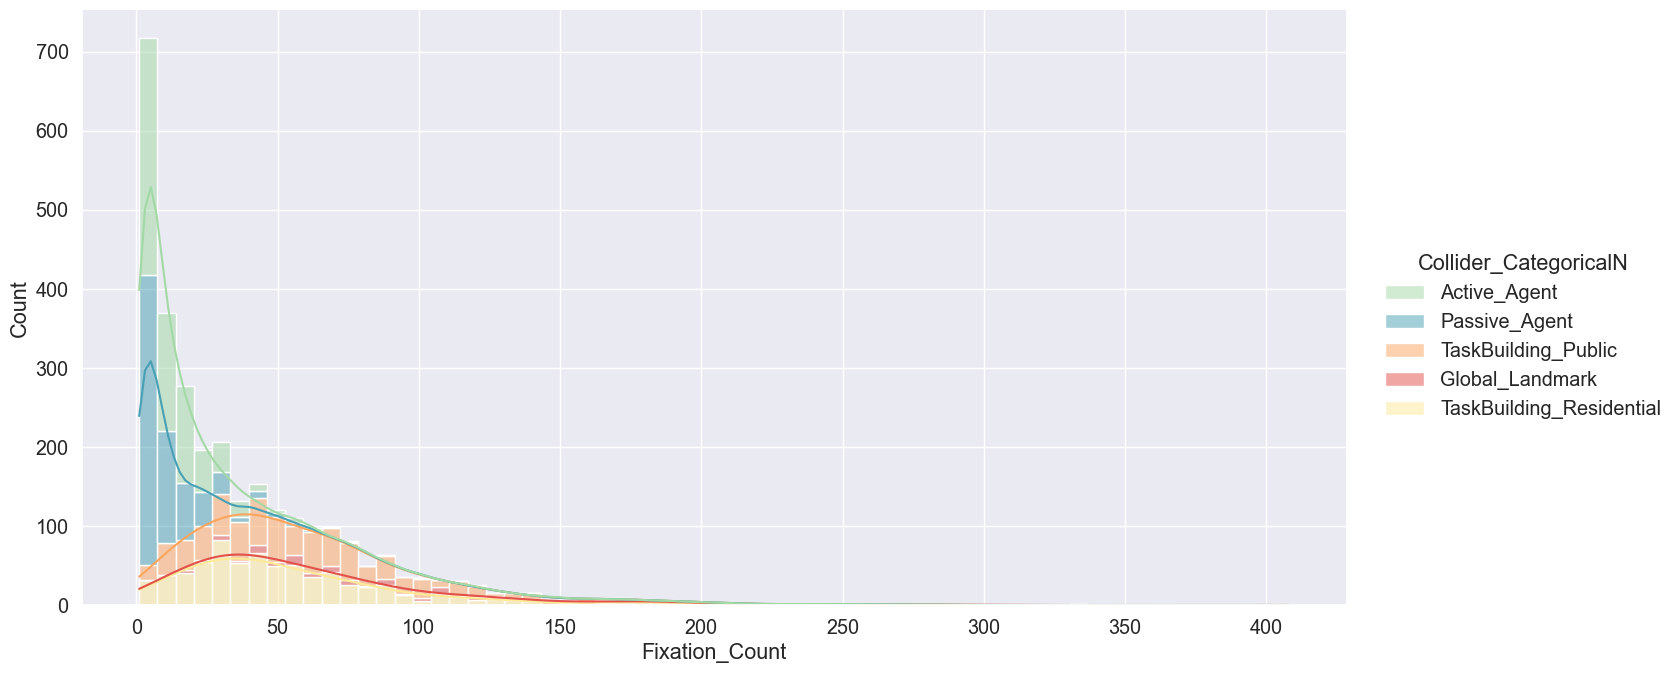

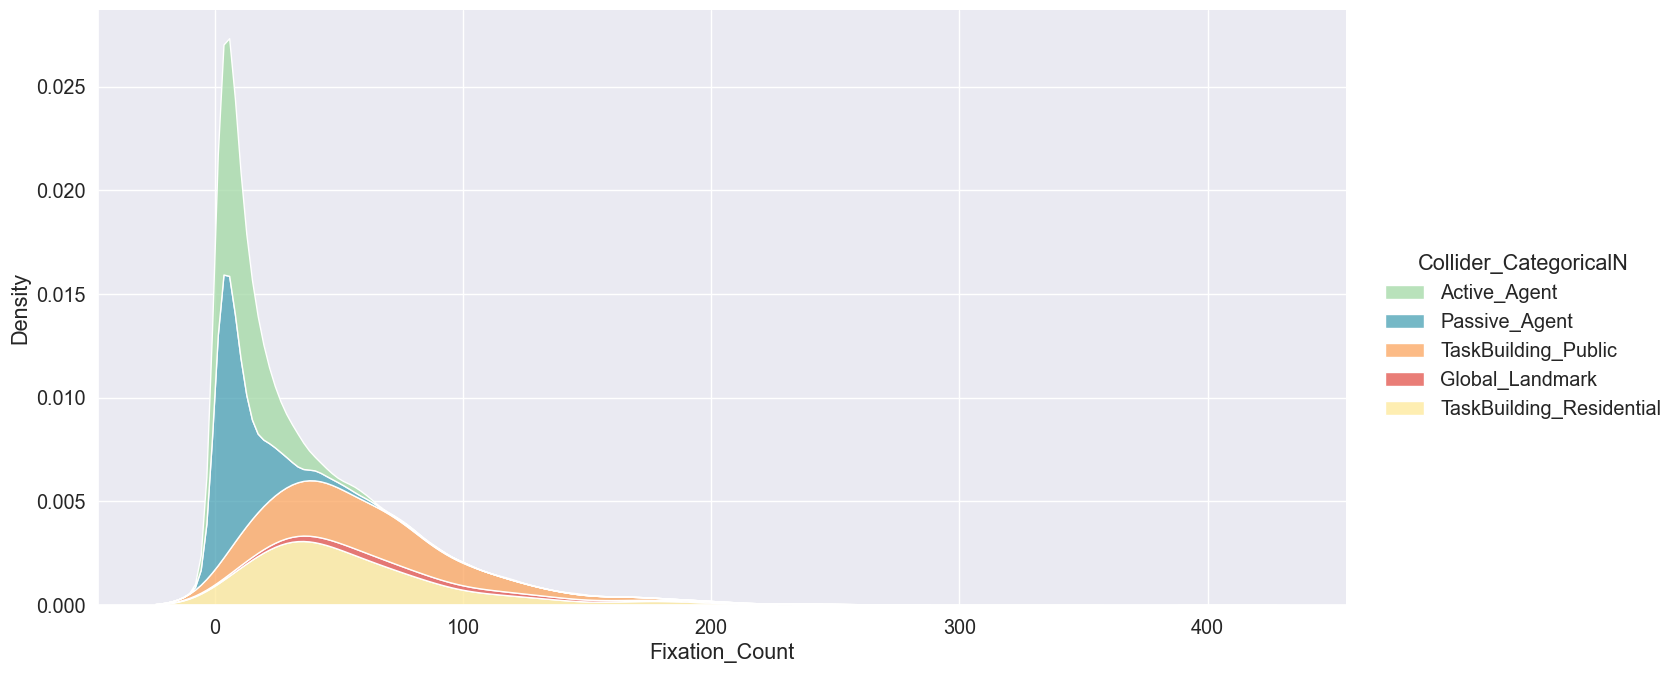

In [68]:
sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kde=True, palette=my_categories, multiple="stack")

sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kind="kde", palette=my_categories, multiple="stack")

In [69]:
Fixation_Dwelling_Time = pd.DataFrame(Fixations.groupby("Collider_CategoricalN")["Dwelling_Time"].mean().sort_values(ascending=False))
Fixation_Dwelling_Time

,Dwelling_Time
Collider_CategoricalN,
Global_Landmark,17.891076
TaskBuilding_Public,11.701010
TaskBuilding_Residential,10.853491
Active_Agent,2.676195
Passive_Agent,2.245161


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/3904058895.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="Collider_CategoricalN", x="Dwelling_Time", order= Fixation_Dwelling_Time.index.values, data=Fixations, \
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/3904058895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(y="Collider_CategoricalN", x="Dwelling_Time",  order= Fixation_Dwelling_Time.index.values, data=Fixations, \
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/3904058895.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.strip

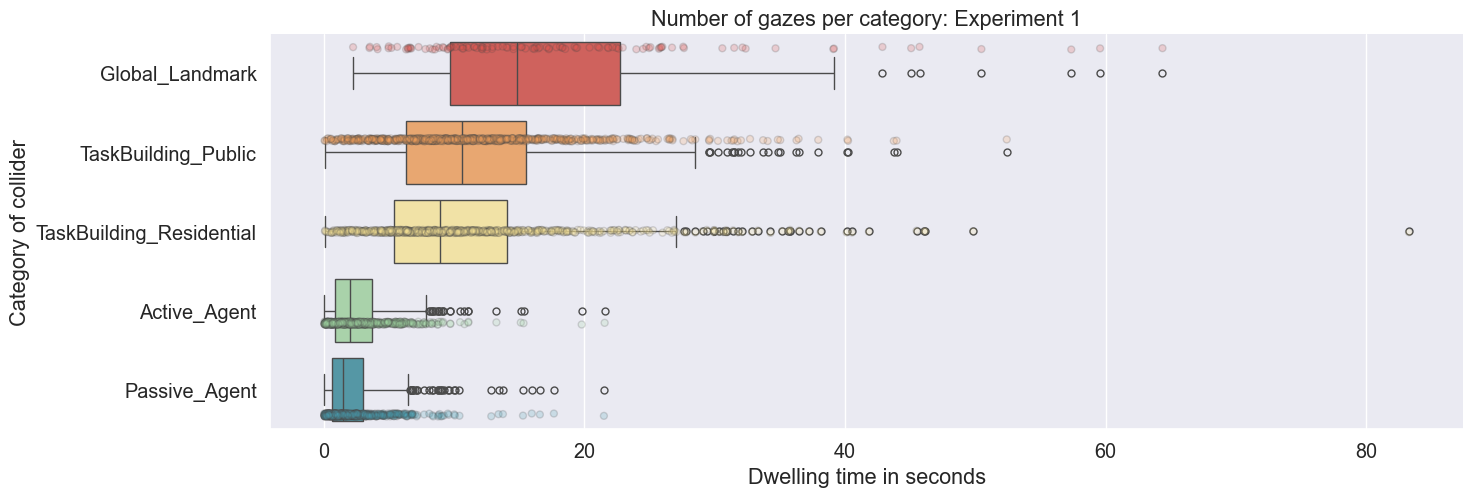

In [70]:
sns.catplot(y="Collider_CategoricalN", x="Dwelling_Time", order= Fixation_Dwelling_Time.index.values, data=Fixations, \
            height=5, aspect=3, kind='box', palette=my_categories)
ax = sns.stripplot(y="Collider_CategoricalN", x="Dwelling_Time",  order= Fixation_Dwelling_Time.index.values, data=Fixations, \
                   alpha=0.2, dodge=True,linewidth=1,edgecolor='gray', palette=my_categories).set(title="Number of gazes per category: Experiment 1", xlabel="Dwelling time in seconds", ylabel= "Category of collider")

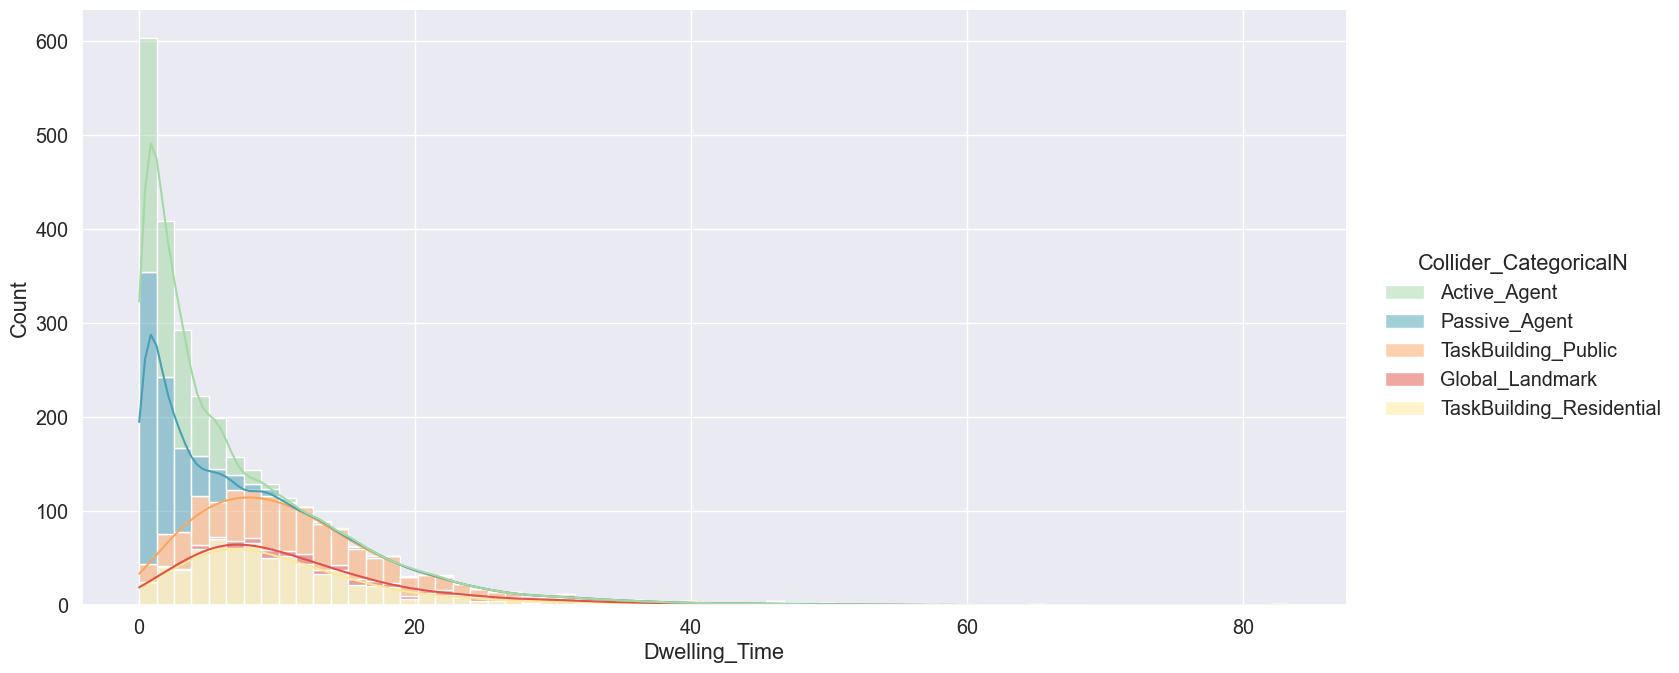

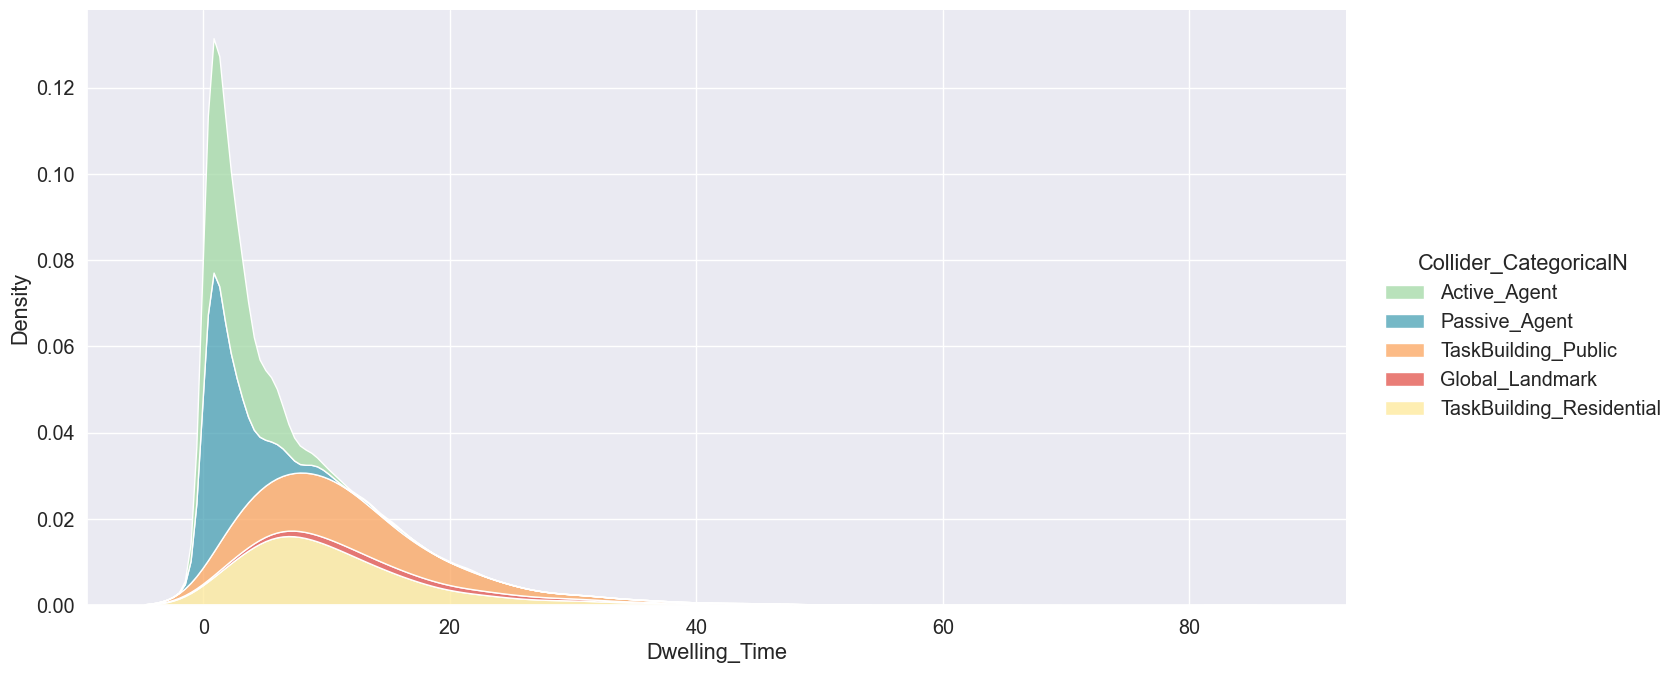

In [71]:
sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kde=True, palette=my_categories, multiple="stack")

sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kind="kde", palette=my_categories, multiple="stack")

<Axes: xlabel='Fixation_Count', ylabel='Dwelling_Time'>

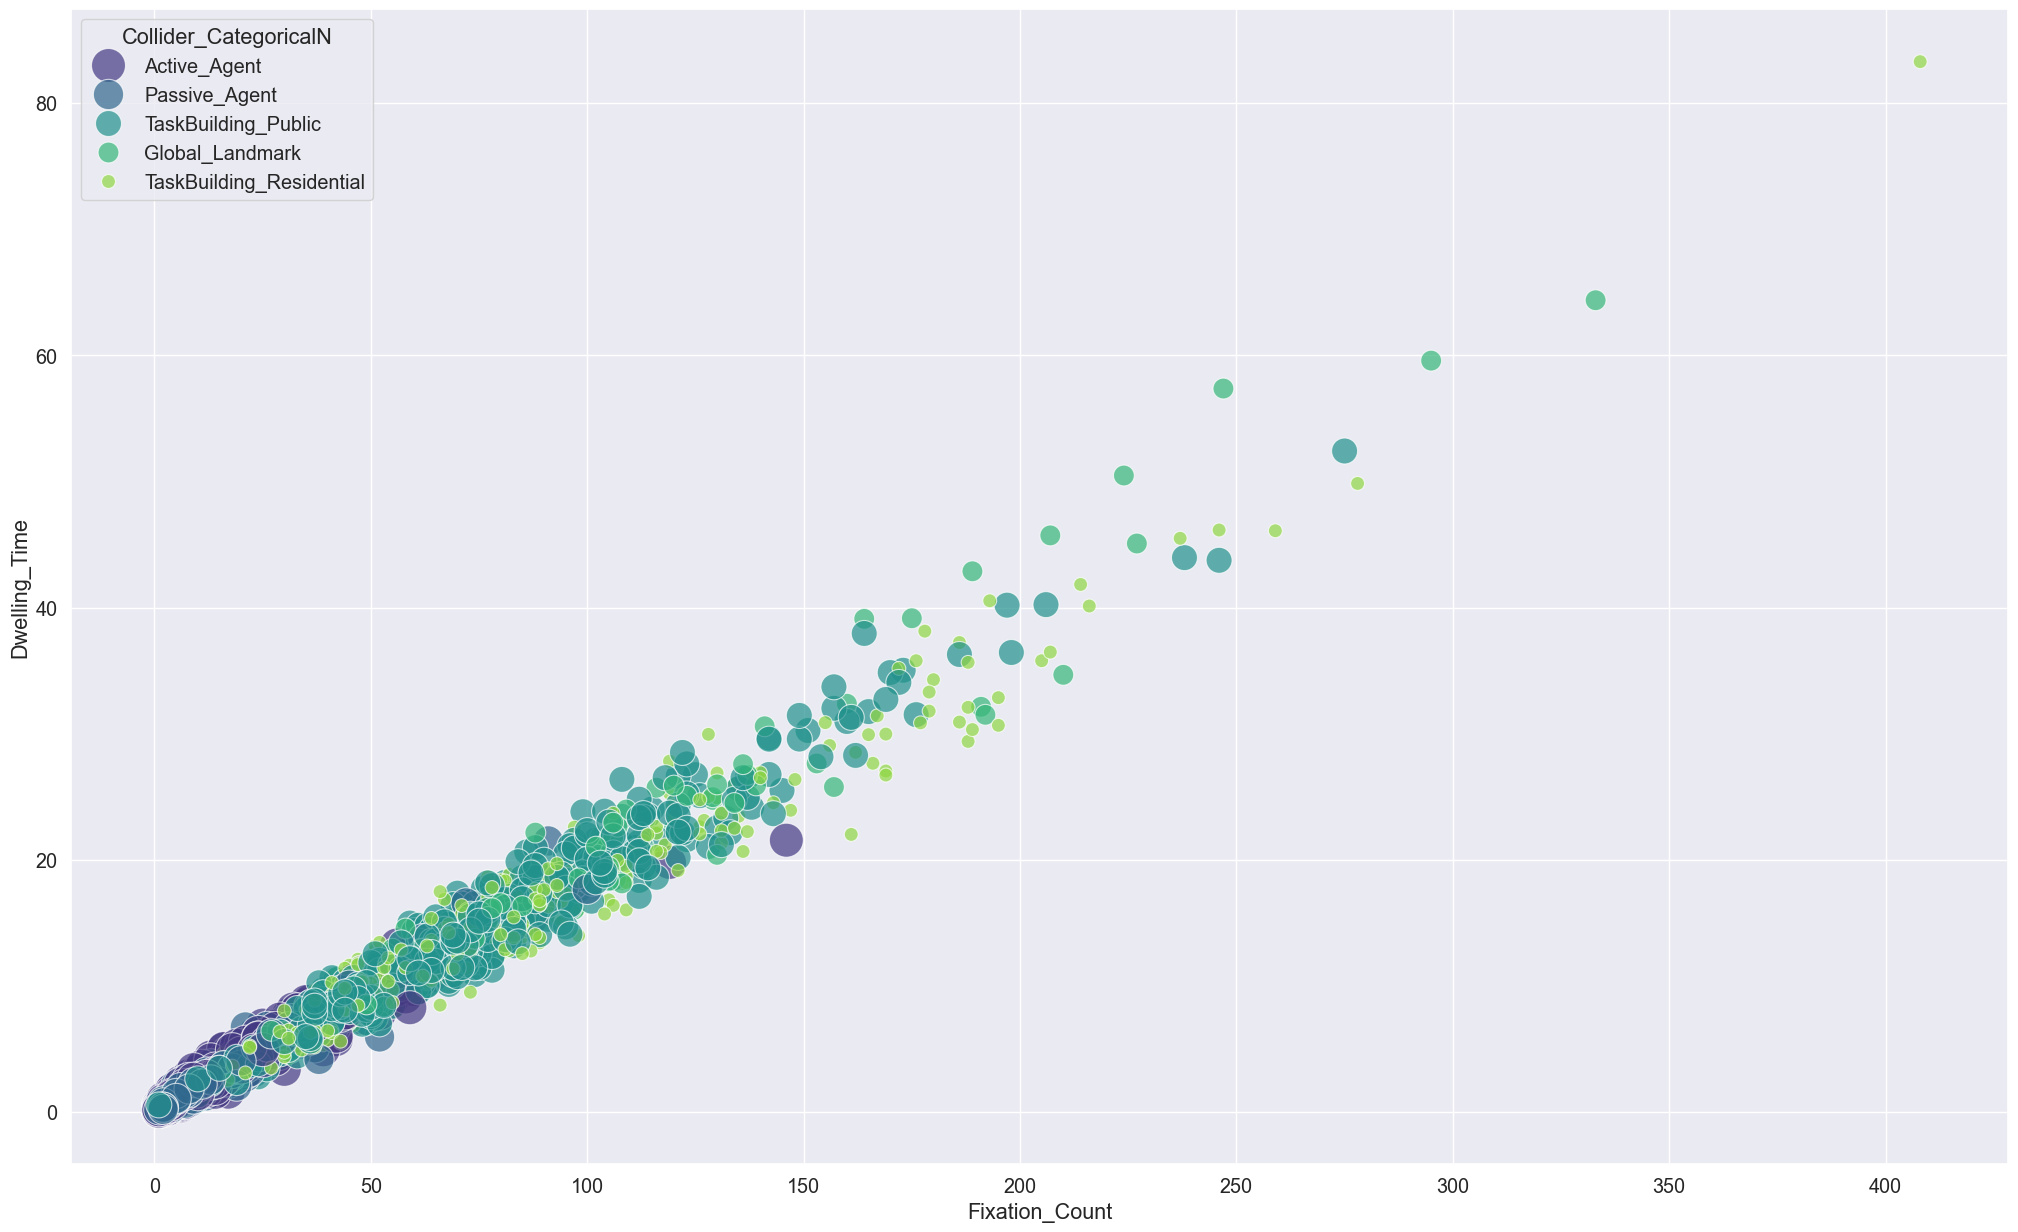

In [72]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.scatterplot(x='Fixation_Count', y='Dwelling_Time', hue="Collider_CategoricalN",
                size="Collider_CategoricalN", sizes=(100,600), legend="full", data=Fixations, alpha=0.7, palette="viridis")

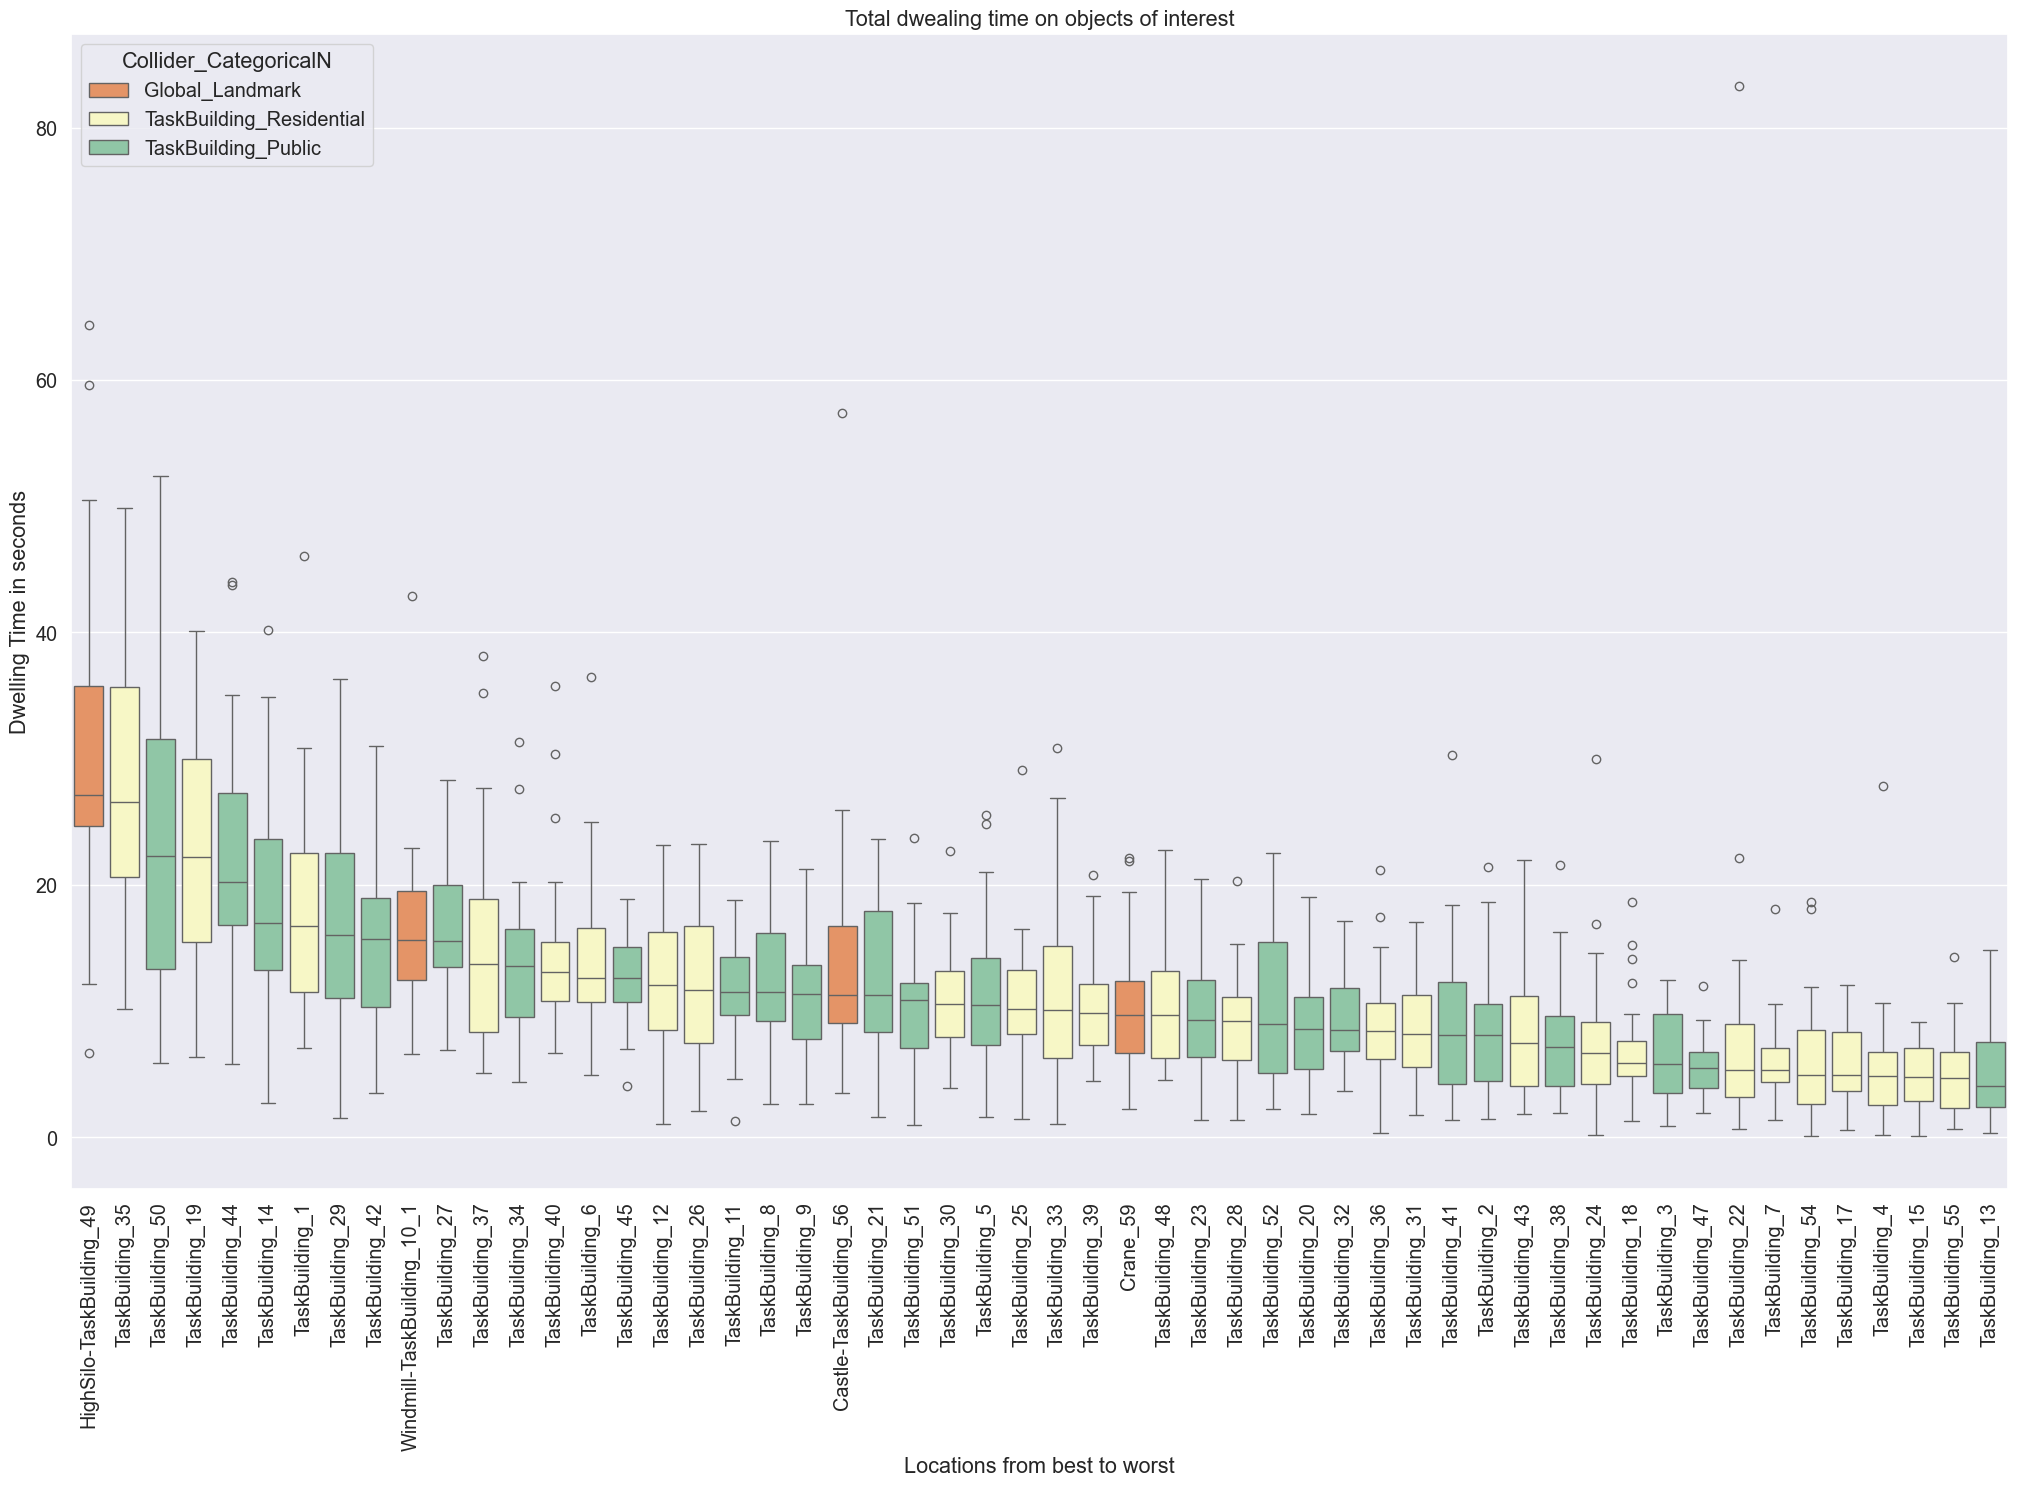

In [73]:
plt.figure(figsize=(25,15))
a = sns.boxplot(x='recoded', y='Dwelling_Time', dodge=False, hue="Collider_CategoricalN", order= order_buildings.index.values, data=TaskBuildings_GL, palette="Spectral")
plt.title('Total dwealing time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Dwelling Time in seconds')
plt.xticks(rotation=90);

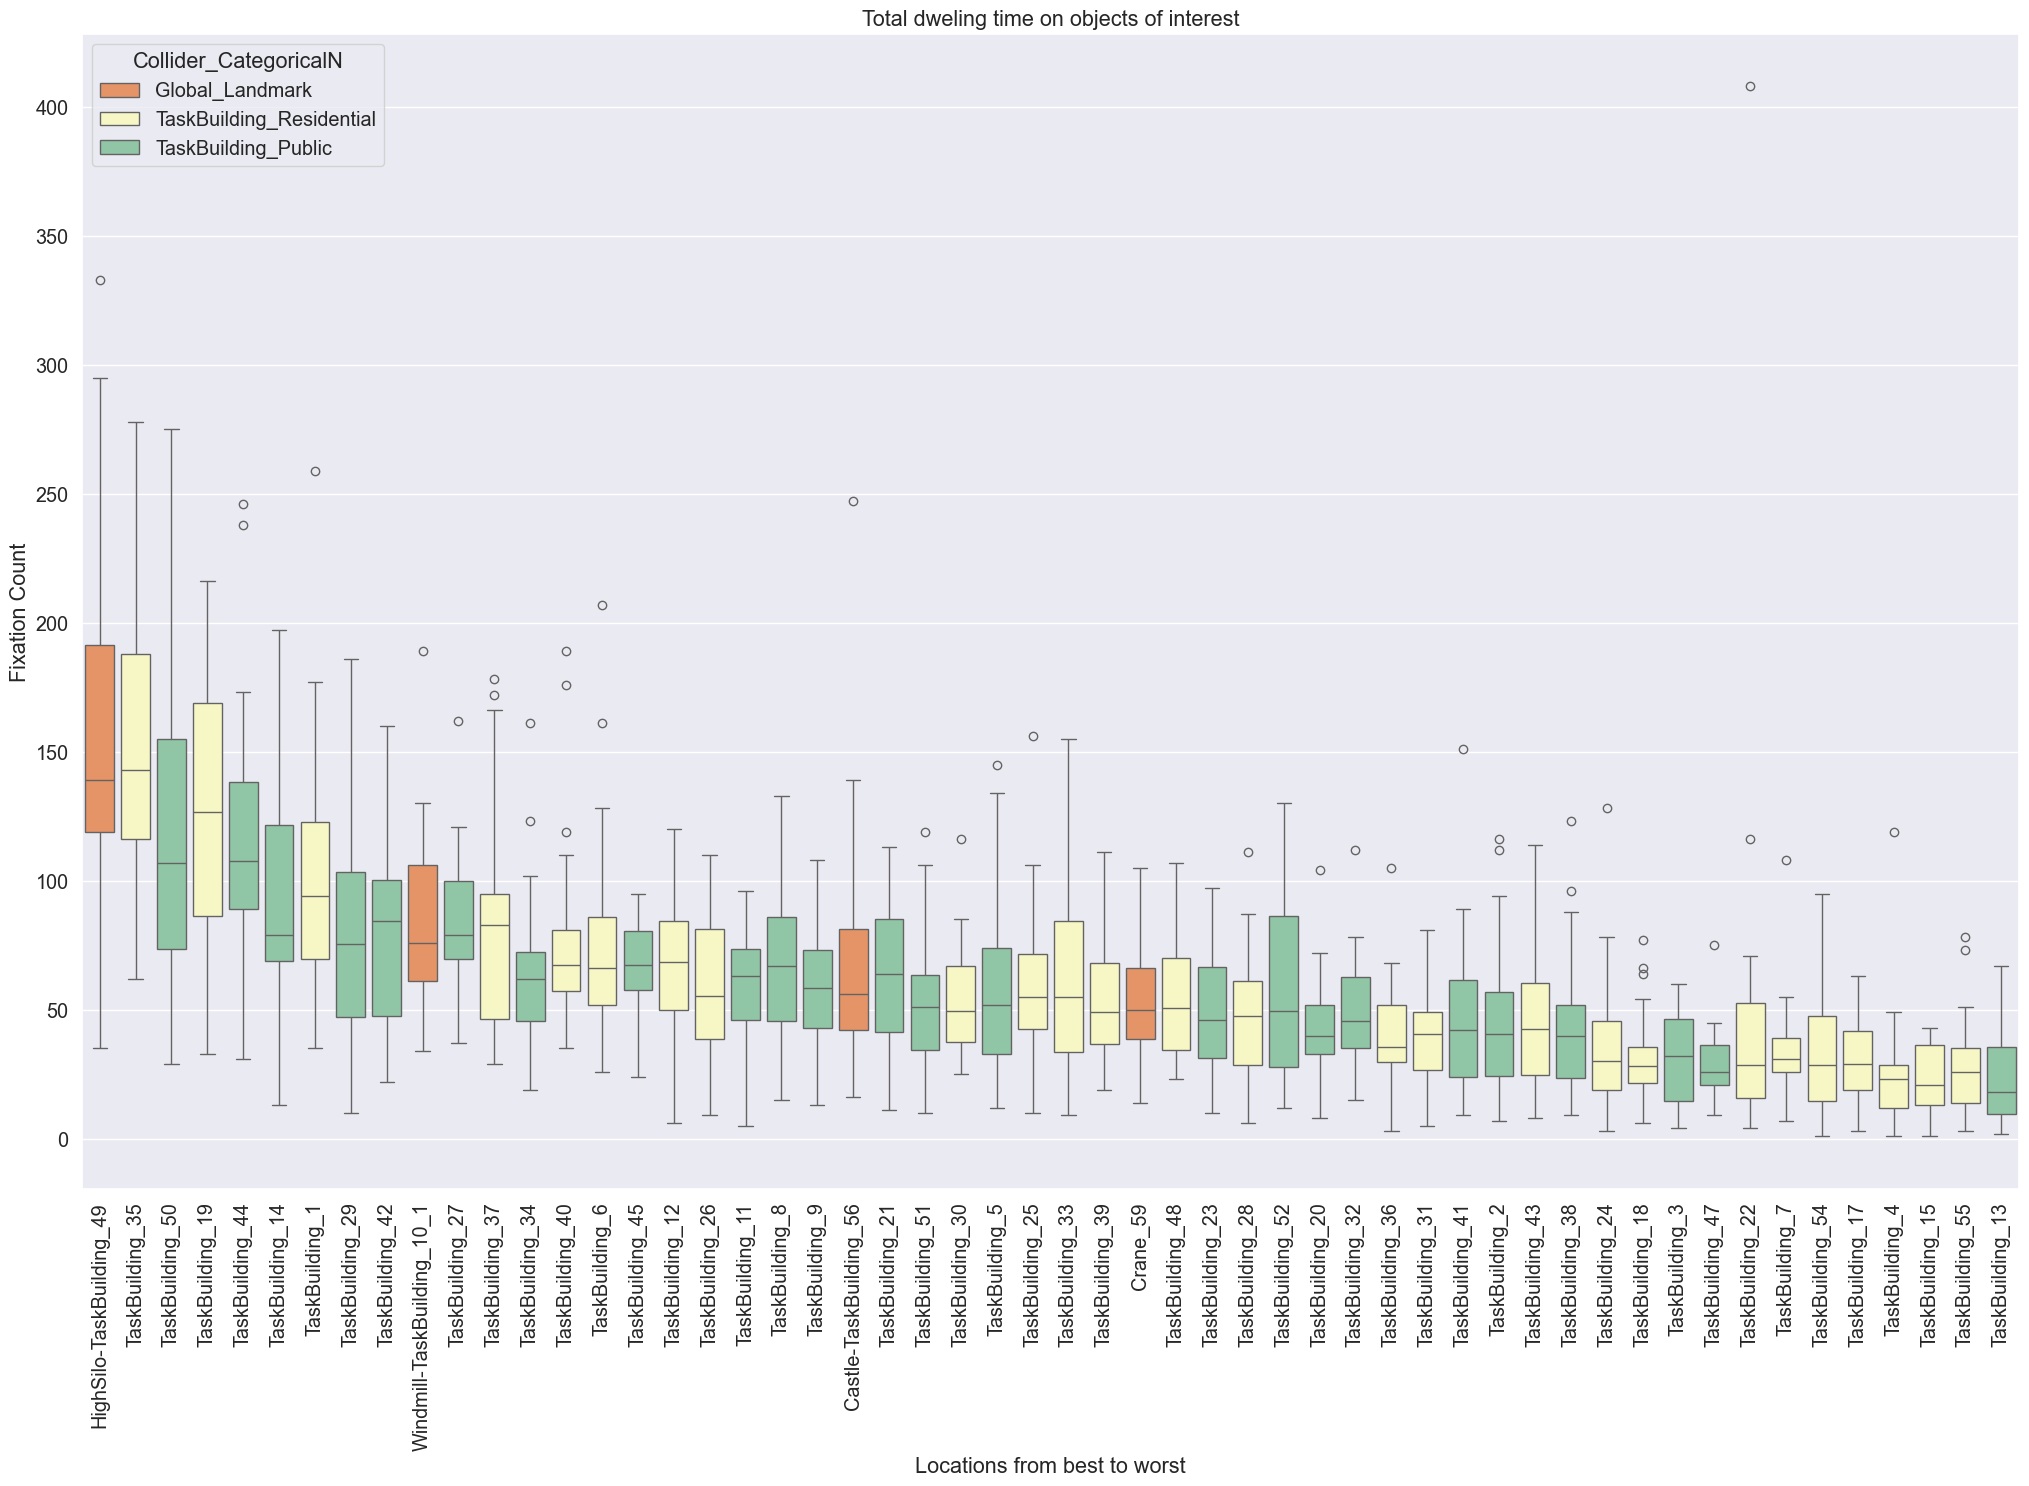

In [74]:
plt.figure(figsize=(25,15))
a = sns.boxplot(x='recoded', y='Fixation_Count', dodge=False, hue="Collider_CategoricalN", order= order_buildings.index.values, data=TaskBuildings_GL, palette="Spectral")
plt.title('Total dweling time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Fixation Count')
plt.xticks(rotation=90);

In [75]:
my_categories_agent = {'Active_Agent': '#a2d9a4',
                'Passive_Agent': '#47a0b3'}

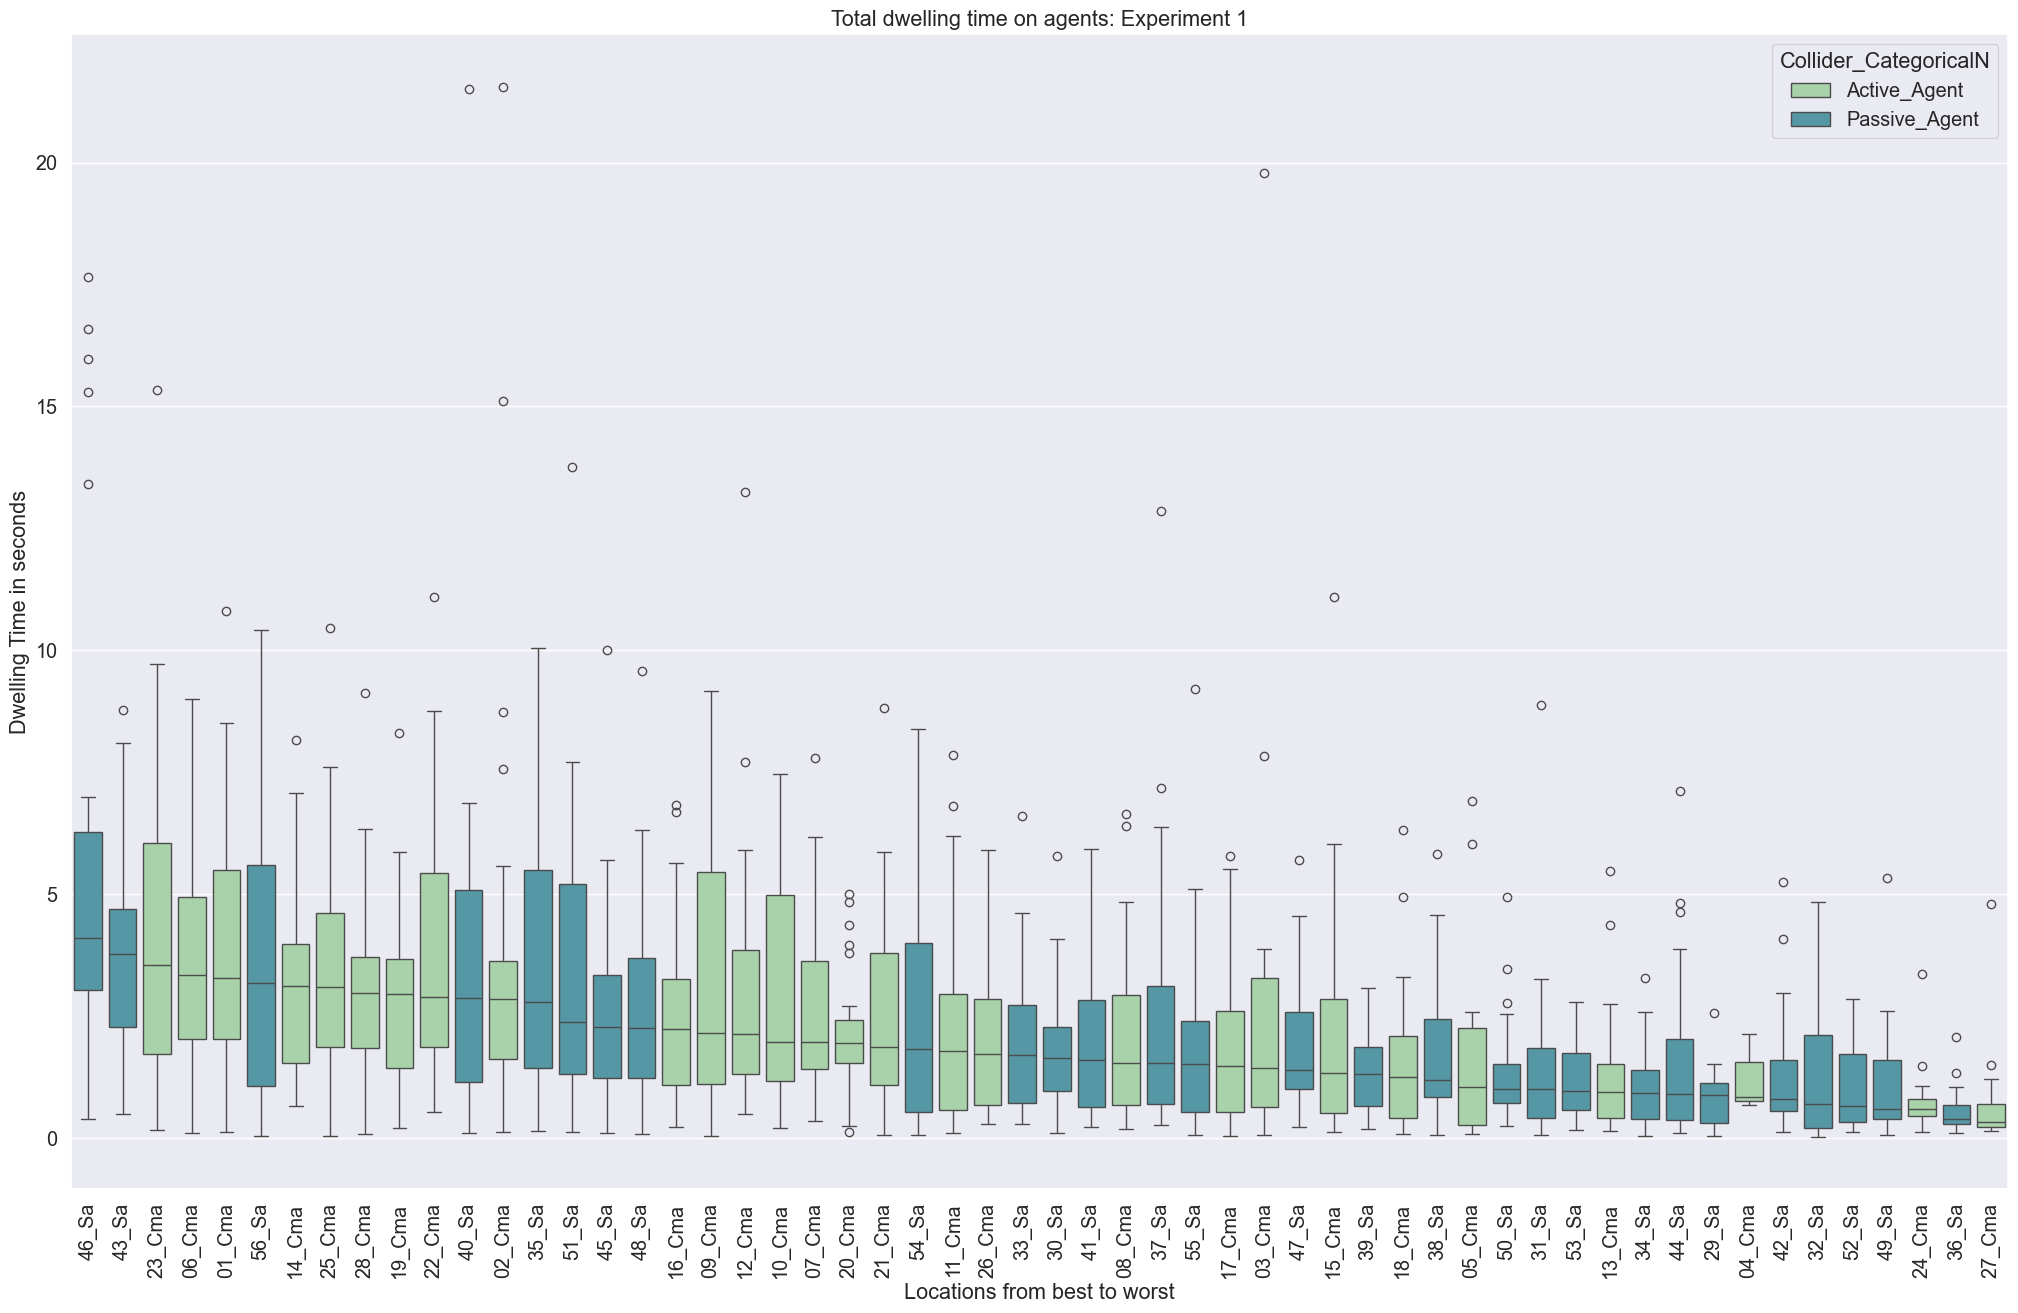

In [76]:
plt.figure(figsize=(25,15))
a = sns.boxplot(x='recoded', y='Dwelling_Time', dodge=False, hue="Collider_CategoricalN", order= order_agents.index.values, data=Agents, palette=my_categories_agent)
plt.title('Total dwelling time on agents: Experiment 1')
plt.xlabel('Locations from best to worst')
plt.ylabel('Dwelling Time in seconds')
plt.xticks(rotation=90);

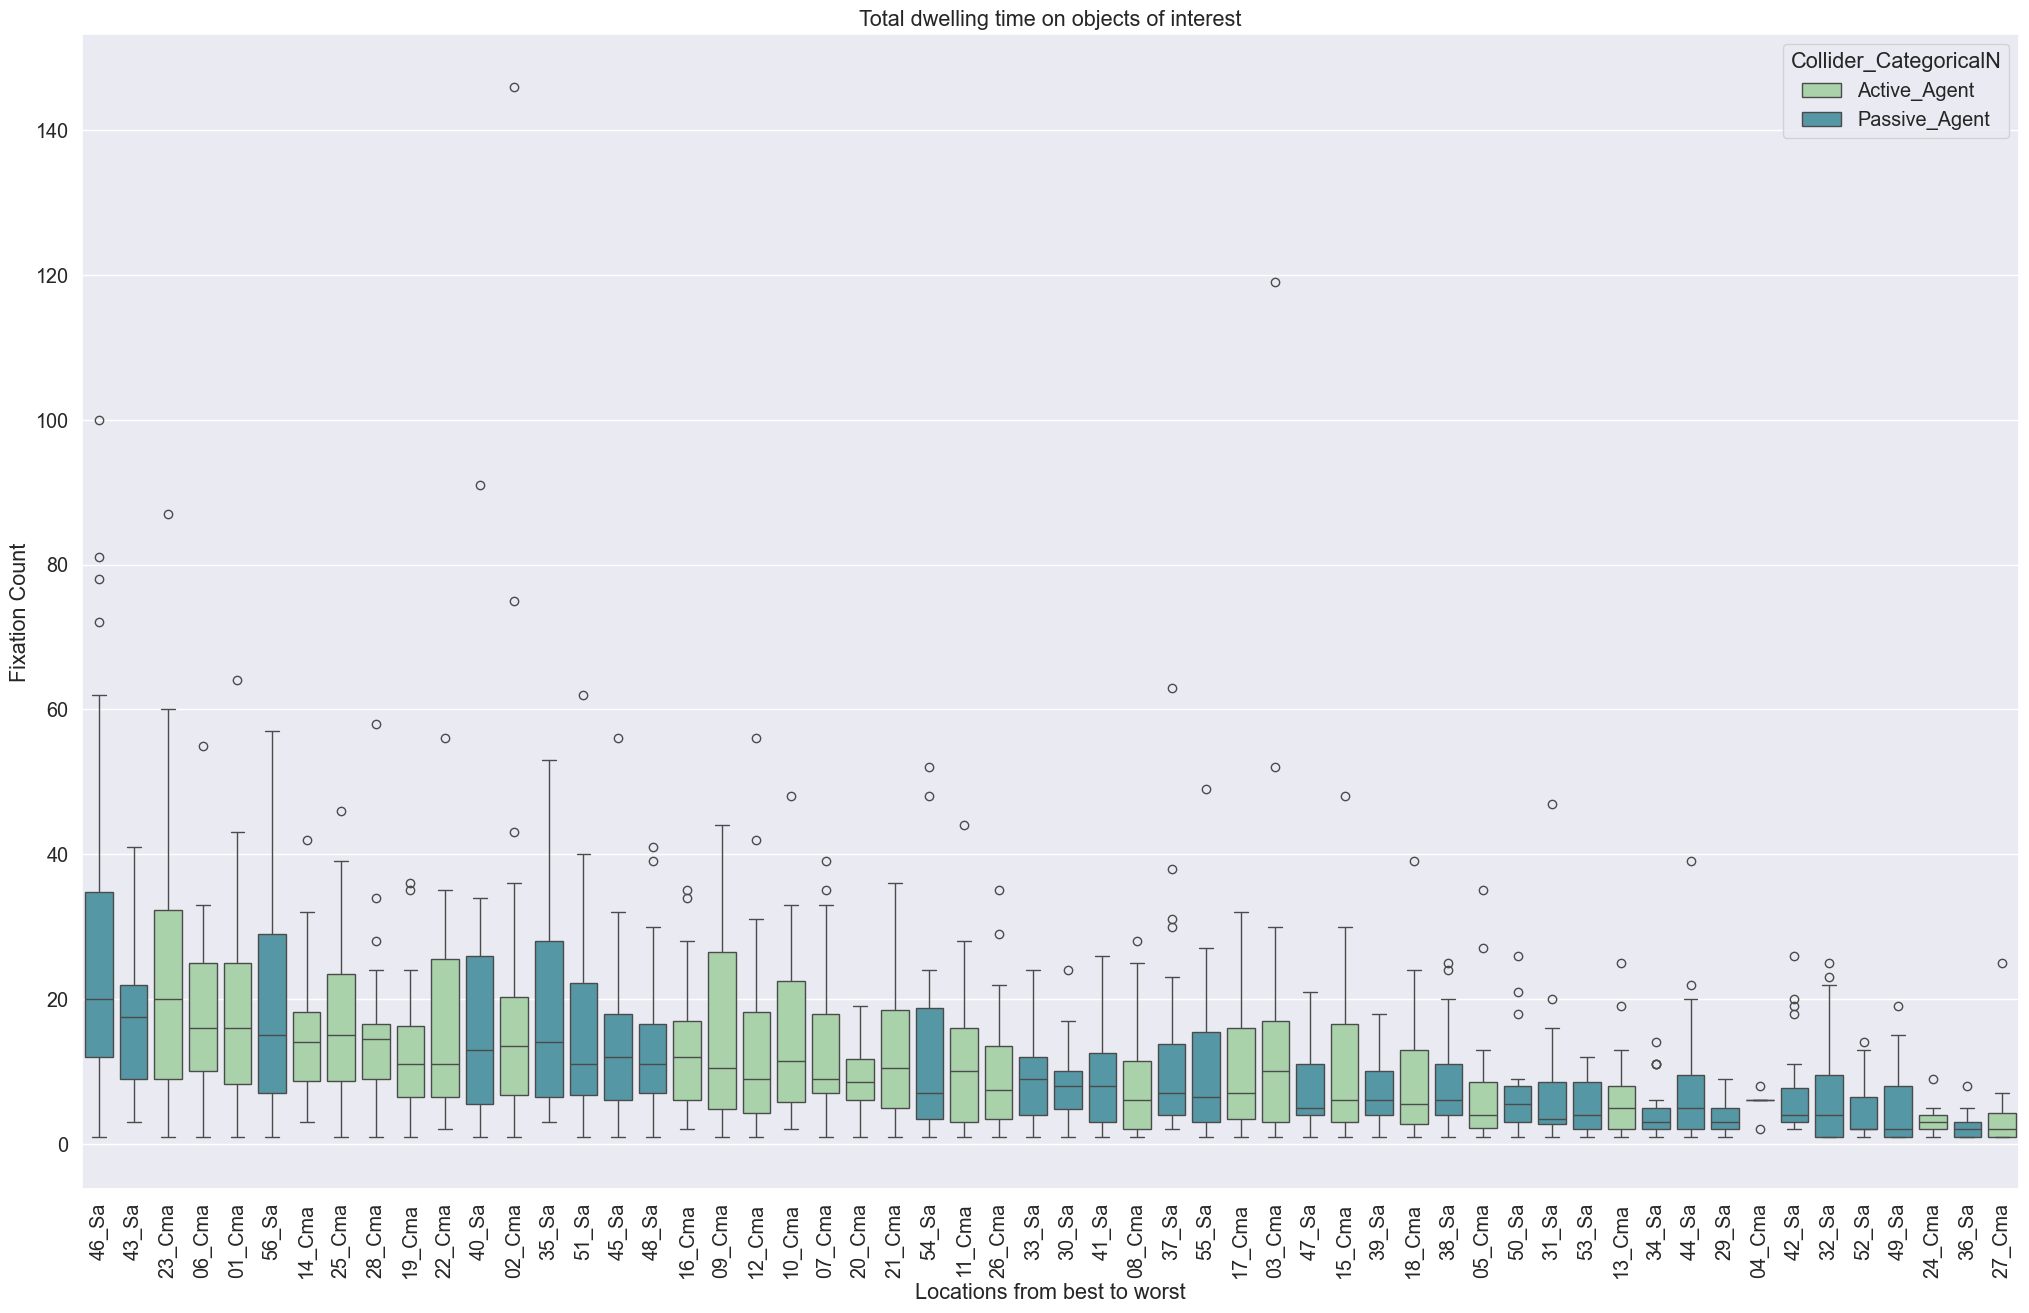

In [77]:
plt.figure(figsize=(25,15))
a = sns.boxplot(x='recoded', y='Fixation_Count', dodge=False, hue="Collider_CategoricalN", order= order_agents.index.values, data=Agents, palette=my_categories_agent )
plt.title('Total dwelling time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Fixation Count')
plt.xticks(rotation=90);

## Preparation for the merging of behavioral data with Dwelling times 

In [78]:
# Create a dictionary that identifies: Agent, Building, and graffity with one ID
patterns1 = {'^01_Cma$':1}
patterns1.update(dict.fromkeys(['^TaskBuilding_14$','^Graffity_14$'], 1))
patterns1.update(dict.fromkeys(['^02_Cma$','^TaskBuilding_41$','^Graffity_41$'], 2))
patterns1.update(dict.fromkeys(['^03_Cma$','^TaskBuilding_2$', '^Graffity_02$'], 3))
patterns1.update(dict.fromkeys(['^04_Cma$','^TaskBuilding_47$','^Graffity_47$'], 4))
patterns1.update(dict.fromkeys(['^05_Cma$','^Construction_57$'], 5))
patterns1.update(dict.fromkeys(['^06_Cma$','^TaskBuilding_20$','^Graffity_20$'], 6))
patterns1.update(dict.fromkeys(['^07_Cma$','^TaskBuilding_9$','^Graffity_09$'], 7))
patterns1.update(dict.fromkeys(['^08_Cma$','^TaskBuilding_50$','^Graffity_50$'], 8))
patterns1.update(dict.fromkeys(['^09_Cma$','^TaskBuilding_45$','^Graffity_45$'], 9))
patterns1.update(dict.fromkeys(['^10_Cma$','^TaskBuilding_8$','^Graffity_08$'], 10))
patterns1.update(dict.fromkeys(['^11_Cma$','^TaskBuilding_27$','^Graffity_27$'], 11))
patterns1.update(dict.fromkeys(['^12_Cma$','^TaskBuilding_51$','^Graffity_51$'], 12))
patterns1.update(dict.fromkeys(['^13_Cma$','^TaskBuilding_3$','^Graffity_03$'], 13))
patterns1.update(dict.fromkeys(['^14_Cma$','^TaskBuilding_11$','^Graffity_11$'], 14))
patterns1.update(dict.fromkeys(['^15_Cma$','^TaskBuilding_42$','^Graffity_42$'], 15))
patterns1.update(dict.fromkeys(['^16_Cma$','^TaskBuilding_23$','^Graffity_23$'], 16))
patterns1.update(dict.fromkeys(['^17_Cma$','^TaskBuilding_52$','^Graffity_52$'], 17))
patterns1.update(dict.fromkeys(['^18_Cma$','^TaskBuilding_38$','^Graffity_38$'], 18))
patterns1.update(dict.fromkeys(['^19_Cma$','^TaskBuilding_34$','^Graffity_34$'], 19))
patterns1.update(dict.fromkeys(['^20_Cma$','^BasketballCourt_58$'], 20))
patterns1.update(dict.fromkeys(['^21_Cma$','^TaskBuilding_5$','^Graffity_05$'], 21))
patterns1.update(dict.fromkeys(['^22_Cma$','^TaskBuilding_29$','^Graffity_29$'], 22))
patterns1.update(dict.fromkeys(['^23_Cma$','^TaskBuilding_32$','^Graffity_32$'], 23))
patterns1.update(dict.fromkeys(['^24_Cma$','^TaskBuilding_13$','^Graffity_13$'], 24))
patterns1.update(dict.fromkeys(['^25_Cma$','^TaskBuilding_44$','^Graffity_44$'], 25))
patterns1.update(dict.fromkeys(['^26_Cma$','^TaskBuilding_21$','^Graffity_21$'], 26))
patterns1.update(dict.fromkeys(['^27_Cma$','^Crane_59$', 'Castle-TaskBuilding_56'], 27))
patterns1.update(dict.fromkeys(['^28_Cma$','^Church-TaskBuilding_16'], 28))
patterns1.update(dict.fromkeys(['^29_Sa$','^TaskBuilding_4$','^Graffity_04$'], 29))
patterns1.update(dict.fromkeys(['^30_Sa$','^TaskBuilding_1$','^Graffity_01$'], 30))
patterns1.update(dict.fromkeys(['^31_Sa$','^TaskBuilding_6$','^Graffity_06$'], 31))
patterns1.update(dict.fromkeys(['^32_Sa$','^TaskBuilding_7$','^Graffity_07$'], 32))
patterns1.update(dict.fromkeys(['^33_Sa$','^TaskBuilding_17$','^Graffity_17$'], 33))
patterns1.update(dict.fromkeys(['^34_Sa$','^TaskBuilding_15$','^Graffity_15$'], 34))
patterns1.update(dict.fromkeys(['^35_Sa$','^TaskBuilding_12$','^Graffity_12$'], 35))
patterns1.update(dict.fromkeys(['^36_Sa$','^TaskBuilding_18$','^Graffity_18$'], 36))
patterns1.update(dict.fromkeys(['^37_Sa$','^TaskBuilding_19$','^Graffity_19$'], 37))
patterns1.update(dict.fromkeys(['^38_Sa$','^TaskBuilding_22$','^Graffity_22$'], 38))
patterns1.update(dict.fromkeys(['^39_Sa$','^TaskBuilding_24$','^Graffity_24$'], 39))
patterns1.update(dict.fromkeys(['^40_Sa','^TaskBuilding_25$','^Graffity_25$'], 40))
patterns1.update(dict.fromkeys(['^41_Sa','^TaskBuilding_26$','^Graffity_26$'], 41))
patterns1.update(dict.fromkeys(['^42_Sa','^TaskBuilding_28$','^Graffity_28$'], 42))
patterns1.update(dict.fromkeys(['^43_Sa','^TaskBuilding_30$','^Graffity_30$'], 43))
patterns1.update(dict.fromkeys(['^44_Sa','^TaskBuilding_31$','^Graffity_31$'], 44))
patterns1.update(dict.fromkeys(['^45_Sa','^TaskBuilding_33$','^Graffity_33$'], 45))
patterns1.update(dict.fromkeys(['^46_Sa','^TaskBuilding_35$','^Graffity_35$'], 46))
patterns1.update(dict.fromkeys(['^47_Sa','^TaskBuilding_36$','^Graffity_36$'], 47))
patterns1.update(dict.fromkeys(['^48_Sa','^TaskBuilding_37$','^Graffity_37$'], 48))
patterns1.update(dict.fromkeys(['^49_Sa','^TaskBuilding_39$','^Graffity_39$'], 49))
patterns1.update(dict.fromkeys(['^50_Sa','^TaskBuilding_40$','^Graffity_40$'], 50))
patterns1.update(dict.fromkeys(['^51_Sa','^TaskBuilding_43$','^Graffity_43$'], 51))
patterns1.update(dict.fromkeys(['^52_Sa','^TaskBuilding_48$','^Graffity_48$'], 52))
patterns1.update(dict.fromkeys(['^53_Sa','^TaskBuilding_54$','^Graffity_54$'], 53))
patterns1.update(dict.fromkeys(['^54_Sa','^TaskBuilding_55$','^Graffity_55$'], 54))
patterns1.update(dict.fromkeys(['^55_Sa','^Windmill-TaskBuilding_10_1'], 55))
patterns1.update(dict.fromkeys(['^56_Sa','^HighSilo-TaskBuilding_49'], 56))
default_val = np.nan

In [79]:
Fixations['avatar_ID'] = Fixations['recoded'].apply(lambda x: next((val for key, val in patterns1.items() if re.match(key, x)), default_val))    

In [80]:
Fixations['Category'] = np.where(Fixations.Collider_CategoricalN.str.contains("Agent"), "Agent_Gaze", "Building_Gaze")

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_2075/633837448.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(y="Collider_CategoricalN", x="Dwelling_Time",hue='Category',   order= Fixation_Dwelling_Time.index.values, data=Fixations, \


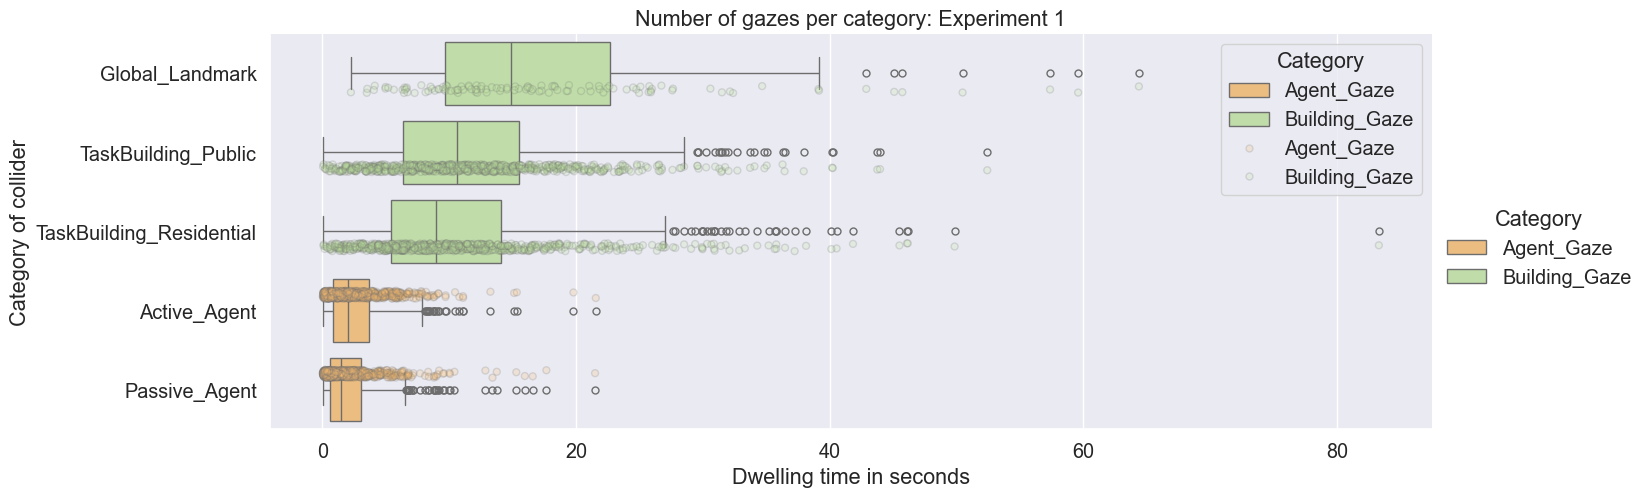

In [81]:
sns.catplot(y="Collider_CategoricalN", x="Dwelling_Time", hue='Category',  order= Fixation_Dwelling_Time.index.values, data=Fixations, \
            height=5, aspect=3, kind='box', palette="Spectral")
ax = sns.stripplot(y="Collider_CategoricalN", x="Dwelling_Time",hue='Category',   order= Fixation_Dwelling_Time.index.values, data=Fixations, \
                   alpha=0.2, dodge=True,linewidth=1,edgecolor='gray', palette="Spectral").set(title="Number of gazes per category: Experiment 1", xlabel="Dwelling time in seconds", ylabel= "Category of collider")

In [82]:
Agent_Fixation = Fixations[Fixations.Category == "Agent_Gaze"]
Building_Fixation = Fixations[Fixations.Category == "Building_Gaze"]
Building_Fixation = Building_Fixation[Building_Fixation.recoded != 'Crane_59'].copy()

In [83]:
Fixations

,SubjectID,recoded,Collider_CategoricalN,Dwelling_Time,Fixation_Count,avatar_ID,Category
0,365,01_Cma,Active_Agent,0.999441,5,1,Agent_Gaze
1,365,02_Cma,Active_Agent,2.241917,8,2,Agent_Gaze
2,365,05_Cma,Active_Agent,0.255441,2,5,Agent_Gaze
3,365,06_Cma,Active_Agent,4.235831,19,6,Agent_Gaze
4,365,07_Cma,Active_Agent,1.380368,6,7,Agent_Gaze
...,...,...,...,...,...,...,...
2947,9601,TaskBuilding_6,TaskBuilding_Residential,19.694432,93,31,Building_Gaze
2948,9601,TaskBuilding_7,TaskBuilding_Residential,5.850799,31,32,Building_Gaze
2949,9601,TaskBuilding_8,TaskBuilding_Public,9.518699,44,10,Building_Gaze
2950,9601,TaskBuilding_9,TaskBuilding_Public,8.078908,44,7,Building_Gaze


In [84]:
Agent_wide_Fixations = Agent_Fixation.pivot(index=["SubjectID", 'avatar_ID'], columns='Category', values=["Dwelling_Time", "Fixation_Count"])
Building_wide_Fixations = Building_Fixation.pivot(index=["SubjectID", 'avatar_ID'], columns='Category', values=["Dwelling_Time", "Fixation_Count"])
Agent_wide_Fixations.reset_index(inplace=True)
Building_wide_Fixations.reset_index(inplace=True)

In [85]:
Agent_wide_Fixations.columns = ['_'.join(col) for col in Agent_wide_Fixations.columns]
Building_wide_Fixations.columns = ['_'.join(col) for col in Building_wide_Fixations.columns]
Agent_wide_Fixations

,SubjectID_,avatar_ID_,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze
0,365,1,0.999441,5.0
1,365,2,2.241917,8.0
2,365,5,0.255441,2.0
3,365,6,4.235831,19.0
4,365,7,1.380368,6.0
...,...,...,...,...
1385,9601,51,6.200965,27.0
1386,9601,52,1.078302,5.0
1387,9601,53,0.376387,2.0
1388,9601,54,0.388366,2.0


In [86]:
Agent_wide_Fixations.rename({"SubjectID_":"SubjectID", "avatar_ID_":"avatar_ID"}, inplace=True, axis=1)
Building_wide_Fixations.rename({"SubjectID_":"SubjectID", "avatar_ID_":"avatar_ID"}, inplace=True, axis=1)

In [87]:
wide_Fixations = Building_wide_Fixations.merge(Agent_wide_Fixations, on=["SubjectID", "avatar_ID"])
wide_Fixations


,SubjectID,avatar_ID,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze
0,365,1,12.048333,60.0,0.999441,5.0
1,365,2,4.683234,20.0,2.241917,8.0
2,365,5,0.424187,1.0,0.255441,2.0
3,365,6,11.538924,54.0,4.235831,19.0
4,365,7,8.279220,38.0,1.380368,6.0
...,...,...,...,...,...,...
1358,9601,51,21.986085,114.0,6.200965,27.0
1359,9601,52,10.778504,62.0,1.078302,5.0
1360,9601,53,6.379526,29.0,0.376387,2.0
1361,9601,54,5.136893,22.0,0.388366,2.0


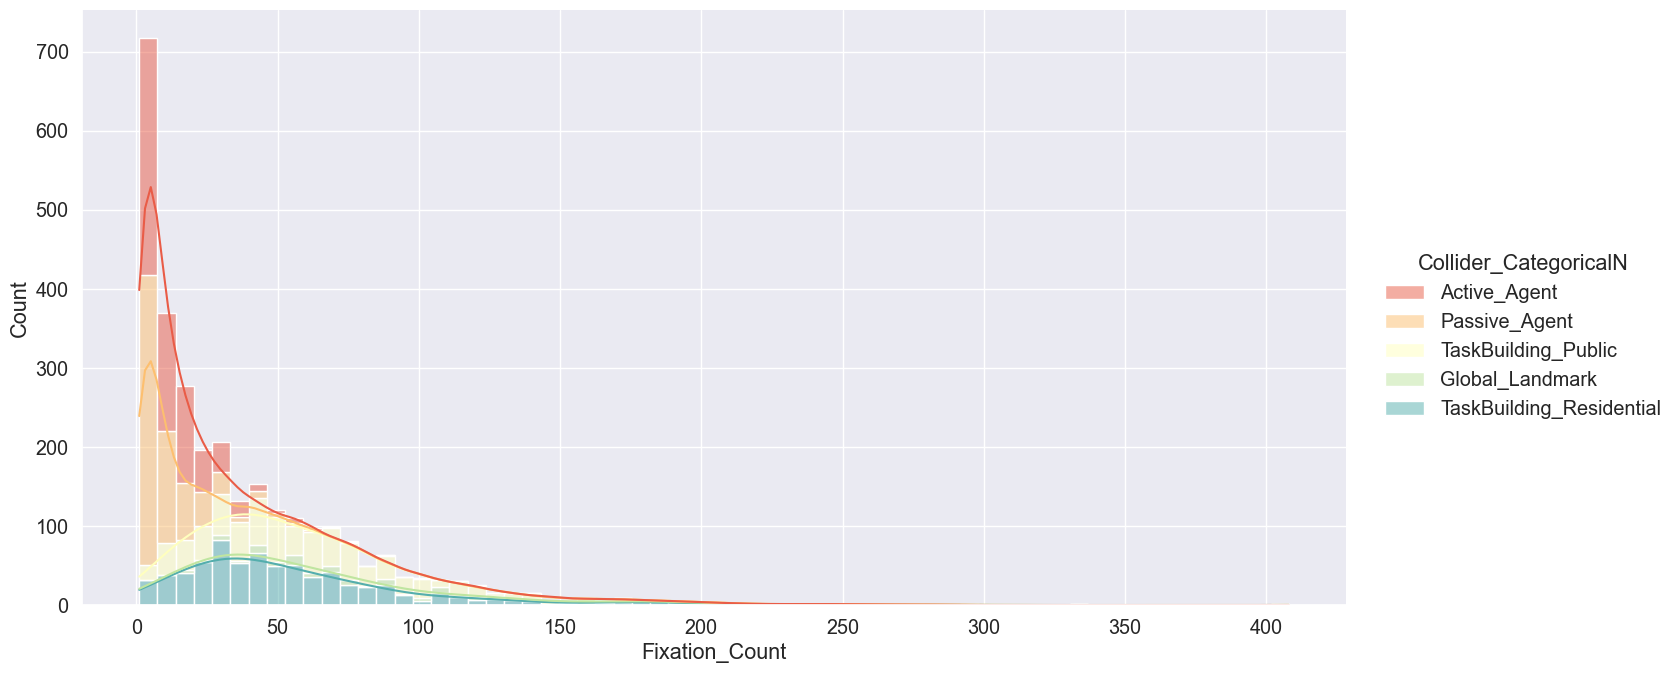

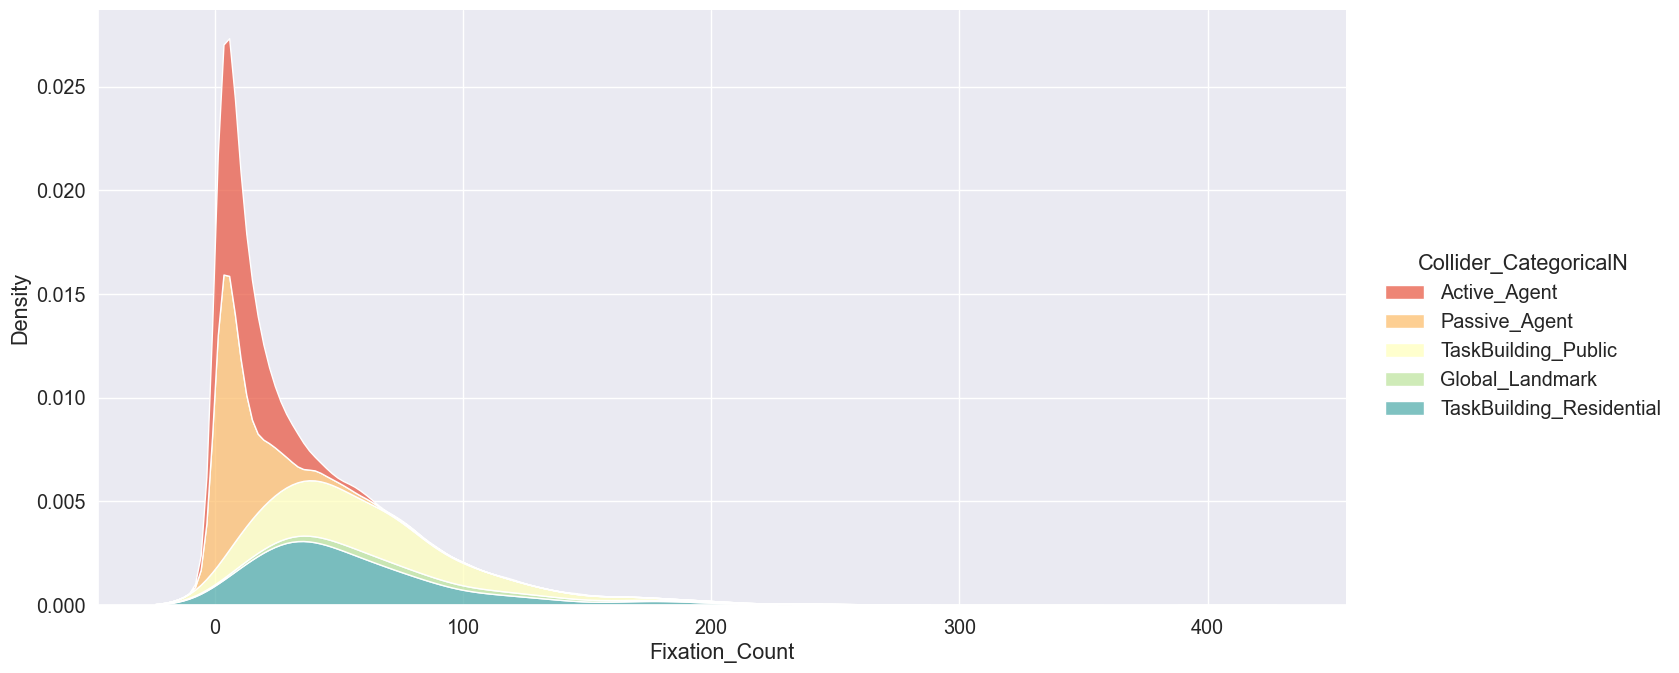

In [88]:
sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kde=True, palette="Spectral", multiple="stack")

sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kind="kde", palette="Spectral", multiple="stack")

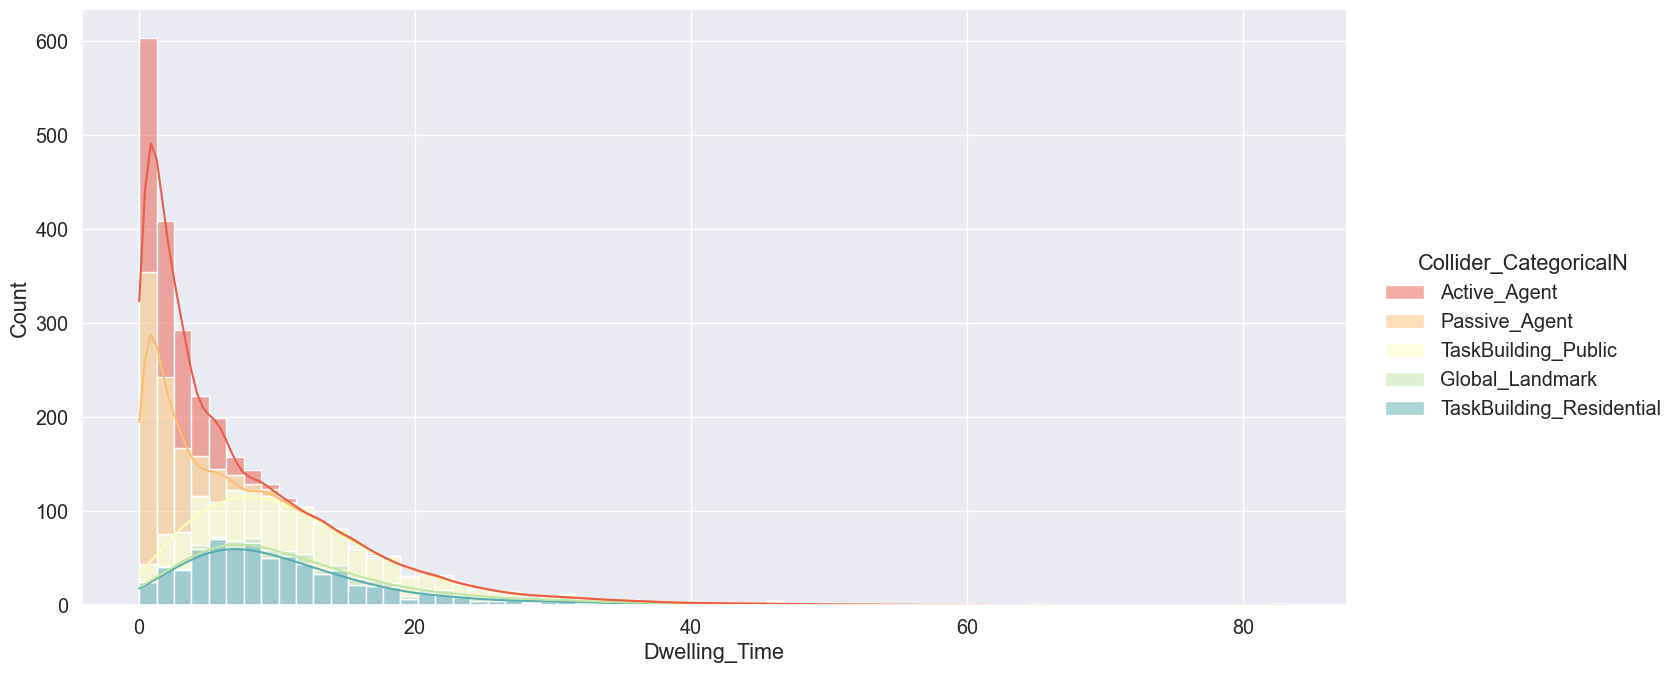

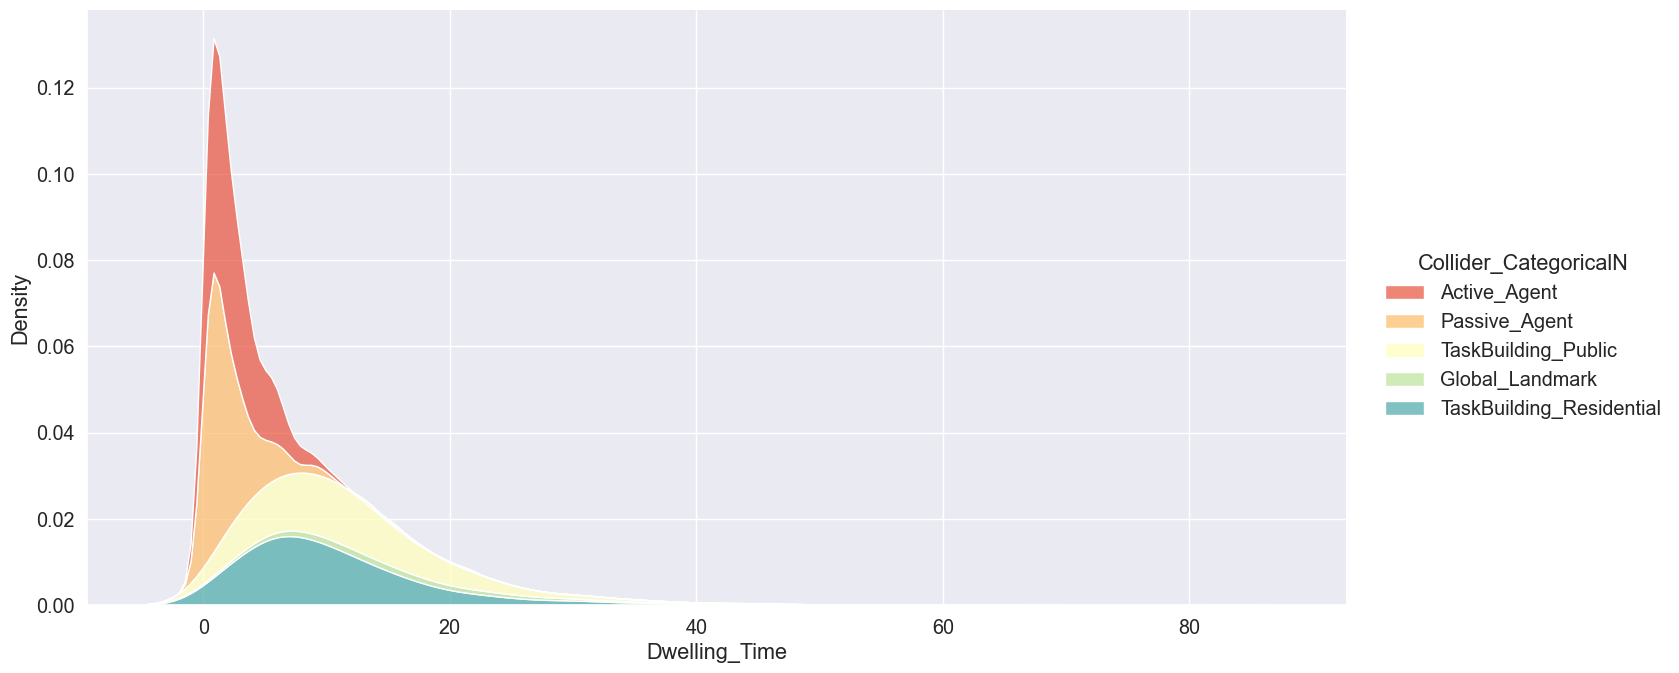

In [89]:
sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kde=True, palette="Spectral", multiple="stack")

sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kind="kde", palette="Spectral", multiple="stack")

In [90]:
Fixations.columns

Index(['SubjectID', 'recoded', 'Collider_CategoricalN', 'Dwelling_Time',
       'Fixation_Count', 'avatar_ID', 'Category'],
      dtype='object')

In [91]:
Behavioral = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Pointing_Task/Results/PointingSummary_1_exp1.csv")

In [92]:
Behavioral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10048 entries, 0 to 10047
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10048 non-null  int64  
 1   ID                             10048 non-null  int64  
 2   AbsolutError                   10048 non-null  float64
 3   SignedAngle-+180               10048 non-null  float64
 4   IQR                            10048 non-null  float64
 5   RT                             10048 non-null  float64
 6   DistanceToParticipant          10048 non-null  float64
 7   PointingTaskStartingLocations  10048 non-null  int64  
 8   TrialNumber                    10048 non-null  int64  
 9   StartPointID                   10048 non-null  int64  
 10  ID_for_StartingPosition        10048 non-null  int64  
 11  avatarID                       10048 non-null  int64  
 12  AvatarPresenceCategory         10048 non-null 

In [93]:
Behavioral.rename({"ID":"SubjectID", "avatarID":"avatar_ID"}, axis=1, inplace=True)
Behavioral

,Unnamed: 0,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,StartPointID,ID_for_StartingPosition,avatar_ID,AvatarPresenceCategory,Context,meaningfulBuilding,ImageName
0,0,365,15.396716,15.396716,63.921884,25.825715,197.768723,21,1,1,1,46,Present,False,Not meaningful,46_Sa
1,1,365,6.037733,-6.037733,63.921884,4.799789,213.475525,16,78,7,6,46,Omitted,False,Not meaningful,46_SaNo
2,2,365,6.345290,6.345290,63.921884,4.638590,111.623512,13,88,8,4,46,Present,False,Not meaningful,46_Sa
3,3,365,3.627752,3.627752,63.921884,2.361455,111.623512,13,95,8,11,46,Omitted,False,Not meaningful,46_SaNo
4,4,365,19.115237,-19.115237,63.921884,5.975304,232.765823,8,131,11,11,46,Omitted,False,Not meaningful,46_SaNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,10043,9601,74.369573,-74.369573,48.844684,13.249648,271.054443,4,50,5,2,53,Omitted,False,Not meaningful,53_SaNo
10044,10044,9601,102.487607,-102.487607,48.844684,13.332483,514.466797,10,115,10,7,53,Present,False,Not meaningful,53_Sa
10045,10045,9601,42.251951,42.251951,48.844684,3.400082,706.590820,5,292,25,4,53,Omitted,False,Not meaningful,53_SaNo
10046,10046,9601,40.642620,40.642620,48.844684,2.924416,706.590820,5,297,25,9,53,Present,False,Not meaningful,53_Sa


In [94]:
BehavioralData_Fixations_Wide = Behavioral.merge(wide_Fixations, on=["SubjectID", "avatar_ID"], how="left")
BehavioralData_Fixations_Wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10048 entries, 0 to 10047
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10048 non-null  int64  
 1   SubjectID                      10048 non-null  int64  
 2   AbsolutError                   10048 non-null  float64
 3   SignedAngle-+180               10048 non-null  float64
 4   IQR                            10048 non-null  float64
 5   RT                             10048 non-null  float64
 6   DistanceToParticipant          10048 non-null  float64
 7   PointingTaskStartingLocations  10048 non-null  int64  
 8   TrialNumber                    10048 non-null  int64  
 9   StartPointID                   10048 non-null  int64  
 10  ID_for_StartingPosition        10048 non-null  int64  
 11  avatar_ID                      10048 non-null  int64  
 12  AvatarPresenceCategory         10048 non-null 

In [95]:
BehavioralData_Fixations_Wide.head()

,Unnamed: 0,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,StartPointID,ID_for_StartingPosition,avatar_ID,AvatarPresenceCategory,Context,meaningfulBuilding,ImageName,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze
0,0,365,15.396716,15.396716,63.921884,25.825715,197.768723,21,1,1,1,46,Present,False,Not meaningful,46_Sa,37.230251,186.0,3.428844,12.0
1,1,365,6.037733,-6.037733,63.921884,4.799789,213.475525,16,78,7,6,46,Omitted,False,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0
2,2,365,6.345290,6.345290,63.921884,4.638590,111.623512,13,88,8,4,46,Present,False,Not meaningful,46_Sa,37.230251,186.0,3.428844,12.0
3,3,365,3.627752,3.627752,63.921884,2.361455,111.623512,13,95,8,11,46,Omitted,False,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0
4,4,365,19.115237,-19.115237,63.921884,5.975304,232.765823,8,131,11,11,46,Omitted,False,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0


In [96]:
BehavioralData_Fixations_Wide["Agent_Category"] = np.where(BehavioralData_Fixations_Wide.avatar_ID > 28, "Passive", "Active")

In [97]:
BehavioralData_Fixations_Wide.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv")

In [98]:
BehavioralData_Fixations_Wide[['Dwelling_Time_Agent_Gaze', 'Dwelling_Time_Building_Gaze',
       'Fixation_Count_Agent_Gaze', 'Fixation_Count_Building_Gaze',  'AbsolutError' ]].corr().style.background_gradient(cmap="Spectral")

,Dwelling_Time_Agent_Gaze,Dwelling_Time_Building_Gaze,Fixation_Count_Agent_Gaze,Fixation_Count_Building_Gaze,AbsolutError
Dwelling_Time_Agent_Gaze,1.000000,0.296460,0.968092,0.314445,-0.022093
Dwelling_Time_Building_Gaze,0.296460,1.000000,0.278887,0.980535,-0.099333
Fixation_Count_Agent_Gaze,0.968092,0.278887,1.000000,0.305714,-0.027319
Fixation_Count_Building_Gaze,0.314445,0.980535,0.305714,1.000000,-0.097324
AbsolutError,-0.022093,-0.099333,-0.027319,-0.097324,1.000000


In [99]:
data_frame_gaze_no_out_ONLY_TEST.groupby([ "Hit_Object_Category", "Session"])["length"].agg(['median','count','mean','std','max', 'min'])

median  count      mean       std       max  \
Hit_Object_Category Session                                                  
Agent               1        0.166659   4236  0.205879  0.135120  0.577841   
                    2        0.166657   4287  0.202798  0.135709  0.577839   
                    3        0.177568   3057  0.210406  0.137584  0.577843   
                    4        0.177567   2702  0.210219  0.135838  0.577841   
                    5        0.166655   2354  0.201030  0.133417  0.577842   
Background          1        0.205096     36  0.199505  0.115279  0.466737   
                    2        0.133921     33  0.188330  0.124246  0.576846   
                    3        0.152272     29  0.187515  0.128058  0.530720   
                    4        0.172608     72  0.199604  0.133036  0.568332   
                    5        0.157722     52  0.178808  0.125642  0.518816   
Building            1        0.154256  14238  0.184199  0.124007  0.577842   
                    2        0.155248  13847  0.186435  0.123797  0.577846   
                    3        0.155248  13141  0.187406  0.125000  0.577845   
                    4        0.155745  12433  0.189647  0.124829  0.577841   
                    5        0.155744  12678  0.187816  0.125413  0.577841   
Global_Landmark     1        0.166160   2438  0.199005  0.131572  0.577347   
                    2        0.167153   2029  0.198553  0.130240  0.577344   
                    3        0.177072   2053  0.201332  0.128277  0.576848   
                    4        0.177568   1825  0.204615  0.131260  0.577839   
                    5        0.166655   1672  0.196773  0.129872  0.577840   
Graffity            1        0.183272   4150  0.211587  0.135391  0.577840   
                    2        0.188479   4256  0.215534  0.136222  0.577843   
                    3        0.178065   3695  0.208983  0.134376  0.577840   
                    4        0.188479   3187  0.218244  0.137616  0.577840   
                    5        0.187983   2986  0.213919  0.133692  0.577839   

                                  min  
Hit_Object_Category Session            
Agent               1        0.032736  
                    2        0.013394  
                    3        0.011407  
                    4        0.032239  
                    5        0.022320  
Background          1        0.043152  
                    2        0.045633  
                    3        0.044144  
                    4        0.042159  
                    5        0.042159  
Building            1        0.010912  
                    2        0.009919  
                    3        0.010417  
                    4        0.008927  
                    5        0.011903  
Global_Landmark     1        0.011408  
                    2        0.010912  
                    3        0.010914  
                    4        0.011407  
                    5        0.010911  
Graffity            1        0.021824  
                    2        0.021824  
                    3        0.033231  
                    4        0.032737  
                    5        0.032737

In [100]:
summary_name_stats_fix_length_NS_Agent.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/summary_name_stats_fix_length_NS_Agent.csv")

NameError: name 'summary_name_stats_fix_length_NS_Agent' is not defined

In [ ]:
summary_name_stats_fix_length_NS = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID", "avatarID", "Hit_Object_Category", "Collider_CategoricalN","Session" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [ ]:
summary_name_stats_fix_length_NS.reset_index(inplace=True)

In [ ]:
summary_name_stats_fix_length_NS

In [ ]:
summary_name_stats_fix_length_NS_Agent = summary_name_stats_fix_length_NS[summary_name_stats_fix_length_NS.Hit_Object_Category == 'Agent'].copy()
summary_name_stats_fix_length_NS_Agent['Agent_Category'] = summary_name_stats_fix_length_NS_Agent['Collider_CategoricalN'].str.contains('Active')
summary_name_stats_fix_length_NS_Agent.loc[:, 'Agent_Category'] = summary_name_stats_fix_length_NS_Agent['Agent_Category'].replace({True: 'Active', False: 'Passive'})

In [ ]:
summary_name_stats_fix_length_NS_Agent

In [ ]:
Complete = pd.merge(HumanA, summary_name_stats_fix_length_NS,
                                 left_on= ['ID','avatarID'],
                                 right_on=['SubjectID','avatarID'],
                   how="right")

In [ ]:
Complete.tail(50)

In [ ]:
Complete.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Gaze_data_long.csv")

In [ ]:
Complete.shape

In [ ]:
HumanA.shape

In [ ]:
summary_name_stats_fix_length_NS.names.unique()

In [ ]:
summary_name_stats_fix_length.shape

In [ ]:
summary_stats_fix_length = pd.DataFrame(data_frame_gaze_no_out.groupby(["Collider_CategoricalN", "SubjectID", "Session"])["length"].agg(['count','mean','median','std','max', 'min']))
summary_stats_fix_length.reset_index(inplace=True)

In [ ]:
summary_name_stats_fix_length_BIG= pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID", "Hit_Object_Category", "Collider_CategoricalN","Session" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [ ]:
summary_name_stats_fix_length_BIG.reset_index(inplace=True)
summary_name_stats_fix_length_BIG.head(20)

In [ ]:
summary_name_stats_fix_length_BIG.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Grouped_Gazes.cvs")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Hit_Object_Category", y="median", hue="Session", data=summary_name_stats_fix_length_BIG[(summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent")], \
            height=5, aspect=3, kind='box').set(title="Median length of gazes per session")
ax = sns.stripplot(x="Hit_Object_Category", y="median", hue="Session", data=summary_name_stats_fix_length_BIG[summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent"], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/counts.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Hit_Object_Category", y="count", hue="Session", data=summary_name_stats_fix_length_BIG[(summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Hit_Object_Category", y="count", hue="Session", data=summary_name_stats_fix_length_BIG[summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent"], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/counts.png',  bbox_inches='tight')

In [ ]:
dy='Hit_Object_Category'; dx='count'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(18, 15))

import ptitprince as pt

ax=pt.half_violinplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
            saturation = 1, orient = ort) 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=100)
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count_Faces.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration_Faces.png',  bbox_inches='tight')

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.tail()

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.columns

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID", "SessionSubsection"])['']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration_All.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="max", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=4, kind='box').set(title="Maximal duration of gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="max",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="std", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=5, aspect=4, kind='box').set(title="Standard Deviation of gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="std",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
ax.set_ylabel("Standard Deviation of gaze duration")
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png', bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="min", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=7, aspect=4, kind='box').set(title="Minimum duration duration of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="min",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=1)
ax.get_legend().remove()
ax.set_ylabel("Minimum duration of gazes per session")
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png', bbox_inches='tight')

In [ ]:
HumanA = pd.read_csv("/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv")

In [ ]:
HumanA.columns

In [ ]:
HumanA["AE_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.AbsolutError - np.nanmedian(HumanA.AbsolutError))) * 1.4826
HumanA["AE_mad_z"] = abs(HumanA.AbsolutError.tolist() - np.nanmedian(HumanA.AbsolutError)) / HumanA.AE_Median_Standard_Duration.tolist()
HumanA["Outlier_AE_Length"] = np.where(HumanA["AE_mad_z"] > 3.5, "Out", "Stays")
HumanA["RT_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.RT - np.nanmedian(HumanA.RT))) * 1.4826
HumanA["RT_mad_z"] = abs(HumanA.RT.tolist() - np.nanmedian(HumanA.RT)) / HumanA.RT_Median_Standard_Duration.tolist()
HumanA["Outlier_RT_Length"] = np.where(HumanA["RT_mad_z"] > 3.5, "Out", "Stays")
HumanA_OUT = HumanA[(HumanA.Outlier_AE_Length != "Out") & (HumanA.Outlier_RT_Length != "Out")]
HumanA_OUT.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/HumanA_NoOut.cvs")

In [ ]:
data_frame.head(50)

In [ ]:
data_frame.info()

In [ ]:
data_frame.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [ ]:
One_participant.columns

In [ ]:
One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)

In [ ]:
One_participant.events.value_counts()

In [ ]:
One_participant['avg_shift'] = One_participant['avg_dist'].shift(1) != One_participant['avg_dist']

In [ ]:
data_frame.iloc[115318:115322,6:9]

In [ ]:
data_frame.info()

In [ ]:
One_participant.iloc[115521:115532,45:50]

In [ ]:
One_participant.iloc[115318:115322,6]

In [ ]:
One_participant.iloc[115322,6] - One_participant.iloc[115318,6]

In [ ]:
One_participant.iloc[115532,6] - One_participant.iloc[115521,6]

In [ ]:
One_participant.tail(200)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
df